## What is EDA - Exploratory Data Analysis

>In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

Amazon is one of the leading e-commerce site today. Online shopping has become a trend now a days. But, before shopping online, people usually go to check reviews of consumers on that particular product. According to a research more than 85% of online shopping depends on reviews of the consumers. So, it is necessary to analyze the flaws in low sale of any product. That's why in this project, we am going to explore and analyze Amazon product reviews, that can be used in other similar projects too. Without talking much, let's move towards coding.

#### _Dataset for project consists of different files according to the category of products. Thus, we will perform analysis on them separately one by one_

### Importing all required libraries

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid")
get_ipython().run_line_magic('matplotlib', 'inline')

#### Generic Methods to Re-Arrange DataFrames

In [330]:
# As we have performed all kind of manipulations before. Thus we only need these changes here
def rearrange_columns(my_df):
    my_df['date'] = pd.to_datetime(df['date'], unit='s')
    my_df['rating'] = my_df['rating'].astype('int32')
    

# Function to create DataFrames for Plotting Graphs according to Dates
def rearrange_dates(df, df_2001=None, df_2002=None, df_2003=None, df_2004=None, df_2005=None, df_2006=None, df_2007=None, df_2008=None, df_2009=None, df_2010=None, df_2011=None, df_2012=None, df_2013=None, df_2014=None, df_2015=None, df_2016=None, df_2017=None, df_2018=None):
    # Rating according to Years
    df_2001 = df[df['date'] <= '2001-12-31']
    df_2002 = df[(df['date'] > '2001-12-31') & (df['date'] <= '2002-12-31')]
    df_2003 = df[(df['date'] > '2002-12-31') & (df['date'] <= '2003-12-31')]
    df_2004 = df[(df['date'] > '2003-12-31') & (df['date'] <= '2004-12-31')]
    df_2005 = df[(df['date'] > '2004-12-31') & (df['date'] <= '2005-12-31')]
    df_2006 = df[(df['date'] > '2005-12-31') & (df['date'] <= '2006-12-31')]
    df_2007 = df[(df['date'] > '2006-12-31') & (df['date'] <= '2007-12-31')]
    df_2008 = df[(df['date'] > '2007-12-31') & (df['date'] <= '2008-12-31')]
    df_2009 = df[(df['date'] > '2008-12-31') & (df['date'] <= '2009-12-31')]
    df_2010 = df[(df['date'] > '2009-12-31') & (df['date'] <= '2010-12-31')]
    df_2011 = df[(df['date'] > '2010-12-31') & (df['date'] <= '2011-12-31')]
    df_2012 = df[(df['date'] > '2011-12-31') & (df['date'] <= '2012-12-31')]
    df_2013 = df[(df['date'] > '2012-12-31') & (df['date'] <= '2013-12-31')]
    df_2014 = df[(df['date'] > '2013-12-31') & (df['date'] <= '2014-12-31')]
    df_2015 = df[(df['date'] > '2014-12-31') & (df['date'] <= '2015-12-31')]
    df_2016 = df[(df['date'] > '2015-12-31') & (df['date'] <= '2016-12-31')]
    df_2017 = df[(df['date'] > '2016-12-31') & (df['date'] <= '2017-12-31')]
    df_2018 = df[(df['date'] > '2017-12-31') & (df['date'] <= '2018-12-31')]
    
    return df_2001, df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018


# Function to create Date Points, and Rating Lists for Graphs
# And to get only valid dates from DataFrames
def getting_years_five_one_ratings():
    
    df_2001, df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018 = rearrange_dates(df)
    
    dfs_1_18 = [df_2001['rating'], df_2002['rating'], df_2003['rating'], df_2004['rating'], df_2005['rating'], df_2006['rating'], df_2007['rating'], df_2008['rating'], df_2009['rating'], df_2010['rating'], df_2011['rating'], df_2012['rating'], df_2013['rating'], df_2014['rating'], df_2015['rating'], df_2016['rating'], df_2017['rating'], df_2018['rating']]

    df_list_1_18 = [list(x.value_counts()) for x in dfs_1_18]

    df_list_five_1_18_final = [x[0] for x in df_list_1_18 if len(x)!=0]

    df_list_one_1_18_final = [x[0] for x in df_list_1_18 if len(x)!=0]
    
    dfs_years = [x for x in range(2018, 2000, -1)]
    dfs_years = sorted(dfs_years[:len(df_list_five_1_18_final)])
    
    return dfs_years, df_list_five_1_18_final, df_list_one_1_18_final

#### Generic Methods for Plotting Graphs

In [324]:
def five_star_rating_graph():
    dfs_years, df_list_five_1_18_final, df_list_one_1_18_final = getting_years_five_one_ratings()
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.set(xlabel="Years", ylabel="Number of ratings", title="Five Star (Best) Rating Tracking")
    plt.xticks(dfs_years) # Or you can also pass (rotation=90) parameter if your xtick_labels are long
    plt.bar(dfs_years, df_list_five_1_18_final, log=True, color='#6f00ff');
    
    
def one_star_rating_graph():
    dfs_years, df_list_five_1_18_final, df_list_one_1_18_final = getting_years_five_one_ratings()
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.set(xlabel="Years", ylabel="Number of ratings", title="One Star (Worst) Rating Tracking")
    plt.xticks(dfs_years) # Or you can also pass (rotation=90) parameter if your xtick_labels are long
    plt.bar(dfs_years, df_list_one_1_18_final, log=True, color='#6f00ff');
    

def rating_boxplot(df):
    sns.boxplot(x="rating", data=df, whis=5, color="#00a2ff");
    
    
def rating_violinplot(df):
    sns.violinplot(y="rating", data=df, bw=0.1, color="#bababa");
    
    
def product_freq_graph(df):
    df['product_id'].value_counts().nlargest(40).plot(kind='bar', figsize=(14,7), grid=True, color="#6f00ff")
    plt.title("Product-Frequency Graph")
    plt.xlabel("Product")
    plt.ylabel("Frequency")
    plt.show()
    
    
def rating_histo_graph(df):
    df["rating"].hist(bins=[0.5,1.5,2.5,3.5,4.5,5.5], figsize=(12,6), grid=True, color="#6f00ff")
    plt.title("People-Rating Graph")
    plt.xlabel("Rating")
    plt.ylabel("Number of Ratings")
    plt.show()
                      
                      
def verified_accounts_graph(df):
    df.verified.value_counts().plot(kind='bar', figsize=(8,6), grid=True, color="#6f00ff")
    plt.title("Verification-Frequency Graph")
    plt.xlabel("Verification Status")
    plt.ylabel("Frequency")
    plt.show()
                      
                      
def vote_helpfulness_graph(df):
    df_verify['vote'].value_counts().nlargest(30).plot(kind='bar', log=True, figsize=(14,7), grid=True, color="#6f00ff")
    plt.title("Helfulness of Review Graph")
    plt.xlabel("Number of Votes a Review is Helpfull")
    plt.ylabel("Frequency")
    plt.show()
                      

def most_frequent_users_graph(df):
    df['reviewerID'].value_counts().nlargest(30).plot(kind='bar', figsize=(14,7), grid=True, color="#6f00ff")
    plt.title("Reviewer-Frequency Graph")
    plt.xlabel("Consumer / Reviewer ID")
    plt.ylabel("Number of Reviews")
    plt.show()

### General Description of Data

- _rating_ --> Overall Rating out of 5
- _reviewerID_ --> ID of the Reviewer
- _product_id_ --> ID of the product being reviewed
- _vote_ --> Helpful votes of the review, i.e. Number of times a review is considered helpful by other users
- _date_ --> Time of the review (unix time), we will change it to normal date formal
- _verified_ --> Account Verification Status

# _Magazine Subscriptions_

In [303]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Magazine_Subscriptions.csv')

In [304]:
df.head(2)

,rating,vote,verified,reviewerID,product_id,date
0,5,9,False,AH2IFH762VY5U,B00005N7P0,1005177600
1,5,9,False,AOSFI0JEYU4XM,B00005N7P0,1004486400


In [305]:
df.shape

(88486, 6)

In [306]:
rearrange_columns(df)

In [307]:
df.head()

,rating,vote,verified,reviewerID,product_id,date
0,5,9,False,AH2IFH762VY5U,B00005N7P0,2001-11-08
1,5,9,False,AOSFI0JEYU4XM,B00005N7P0,2001-10-31
2,3,14,False,A3JPFWKS83R49V,B00005N7OJ,2007-03-24
3,5,13,False,A19FKU6JZQ2ECJ,B00005N7OJ,2006-11-10
4,5,NaN,True,A25MDGOMZ2GALN,B00005N7P0,2014-07-14


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88486 entries, 0 to 88485
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rating      88486 non-null  int32         
 1   vote        23771 non-null  object        
 2   verified    88486 non-null  bool          
 3   reviewerID  88486 non-null  object        
 4   product_id  88486 non-null  object        
 5   date        88486 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 3.1+ MB


In [309]:
print(df.isnull().sum())

rating            0
vote          64715
verified          0
reviewerID        0
product_id        0
date              0
dtype: int64


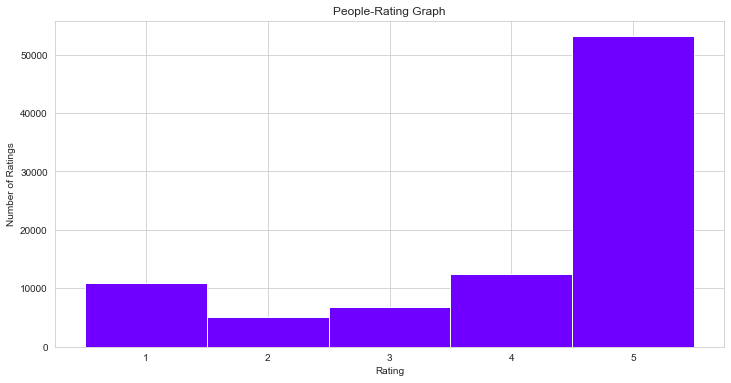

In [310]:
rating_histo_graph(df)

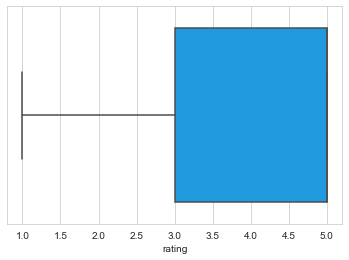

In [311]:
rating_boxplot(df)

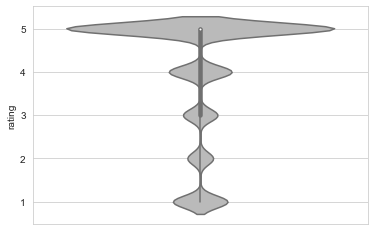

In [312]:
rating_violinplot(df)

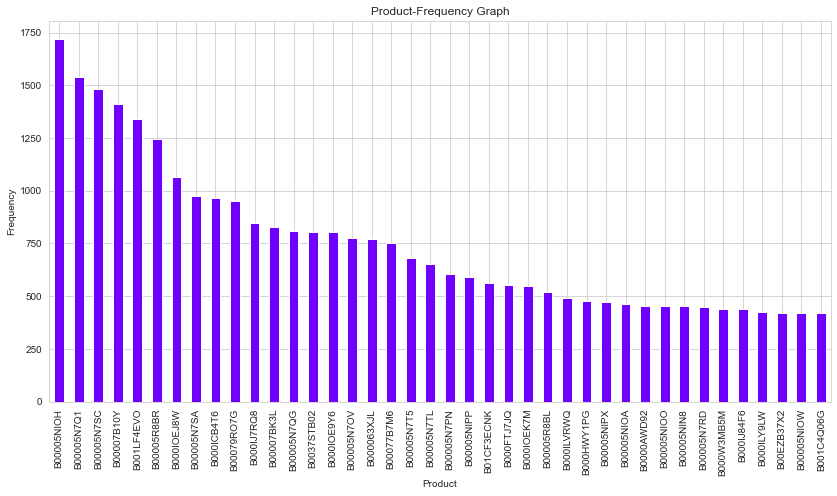

In [313]:
product_freq_graph(df)

In [314]:
df.corr()

,rating,verified
rating,1.000000,0.166468
verified,0.166468,1.000000


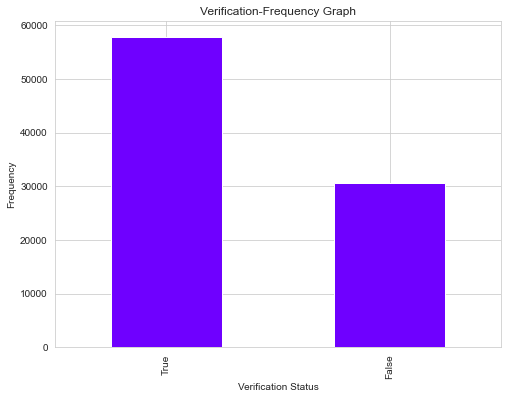

In [315]:
verified_accounts_graph(df)

In [316]:
df_verify = df.dropna()

In [317]:
df_verify.shape

(23771, 6)

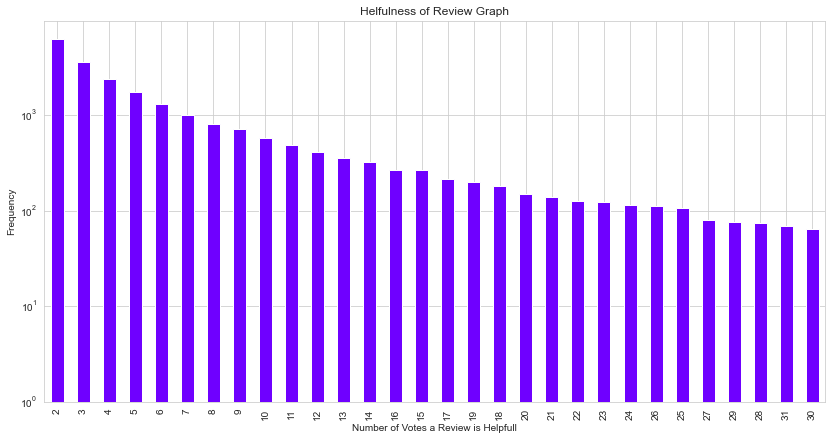

In [318]:
vote_helpfulness_graph(df)

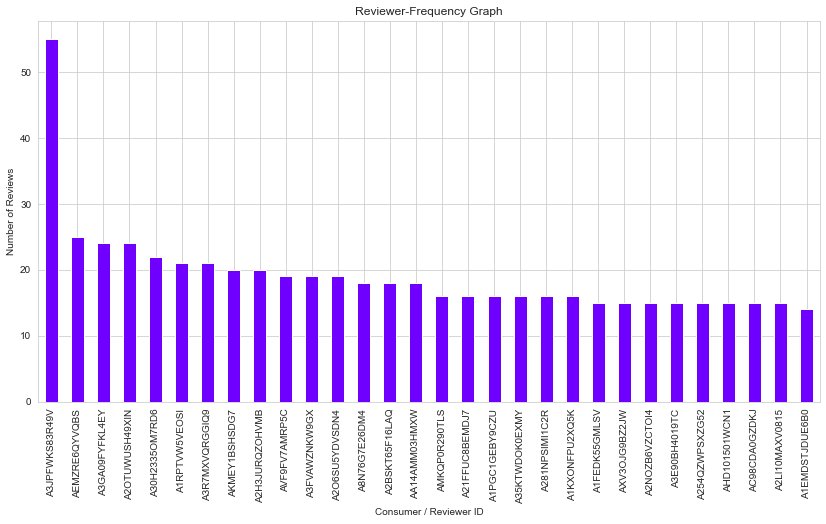

In [325]:
most_frequent_users_graph(df)

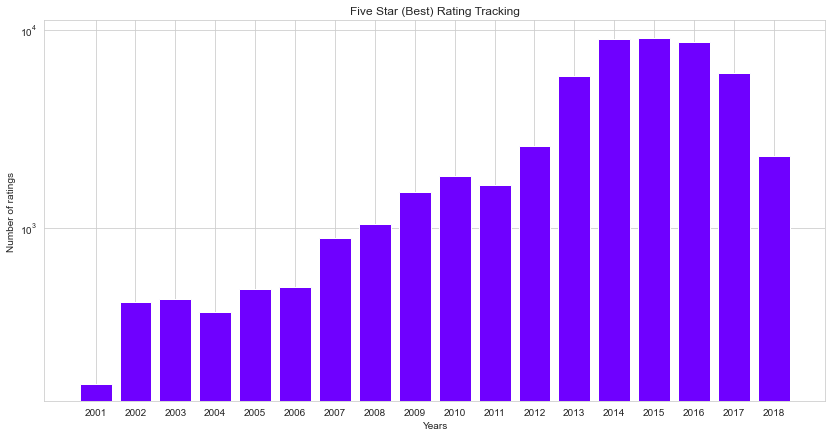

In [326]:
five_star_rating_graph()

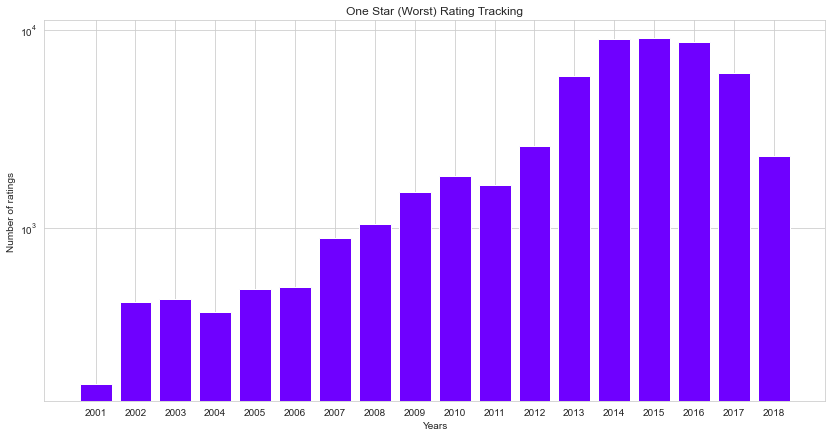

In [327]:
one_star_rating_graph()

# _Gift Cards_

In [34]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Gift_Cards.csv')

In [35]:
df.head(2)

,rating,vote,verified,reviewerID,product_id,date
0,1,25,False,APV13CM0919JD,B001GXRQW0,1229644800
1,5,NaN,False,A3G8U1G1V082SN,B001GXRQW0,1229472000


In [36]:
rearrange_columns(df)

In [37]:
df.shape

(147160, 6)

In [38]:
df.head()

,rating,vote,verified,reviewerID,product_id,date
0,1,25,False,APV13CM0919JD,B001GXRQW0,2008-12-19
1,5,NaN,False,A3G8U1G1V082SN,B001GXRQW0,2008-12-17
2,5,4,False,A11T2Q0EVTUWP,B001GXRQW0,2008-12-17
3,5,NaN,False,A9YKGBH3SV22C,B001GXRQW0,2008-12-17
4,1,NaN,True,A34WZIHVF3OKOL,B001GXRQW0,2008-12-17


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147160 entries, 0 to 147159
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   rating      147160 non-null  int32         
 1   vote        6341 non-null    object        
 2   verified    147160 non-null  bool          
 3   reviewerID  147160 non-null  object        
 4   product_id  147160 non-null  object        
 5   date        147160 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 5.2+ MB


In [40]:
print(df.isnull().sum())

rating             0
vote          140819
verified           0
reviewerID         0
product_id         0
date               0
dtype: int64


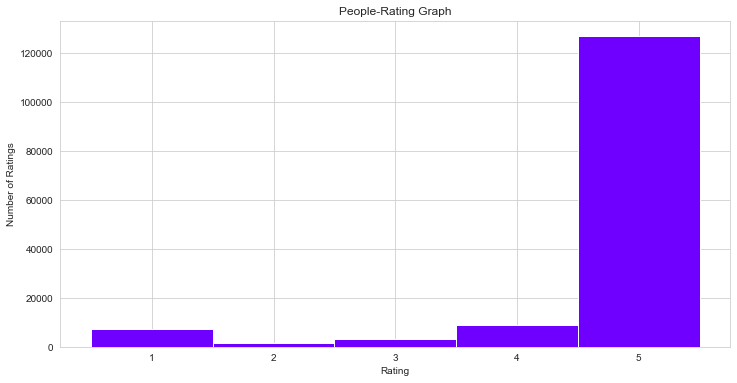

In [41]:
rating_histo_graph(df)

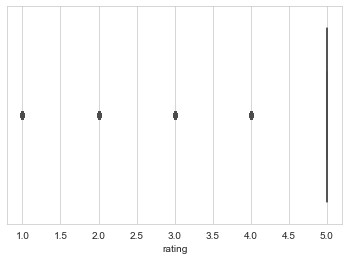

In [42]:
rating_boxplot(df)

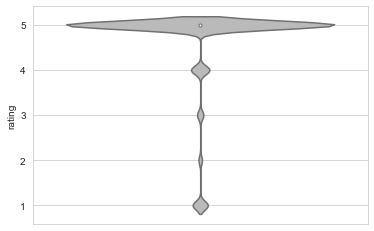

In [43]:
rating_violinplot(df)

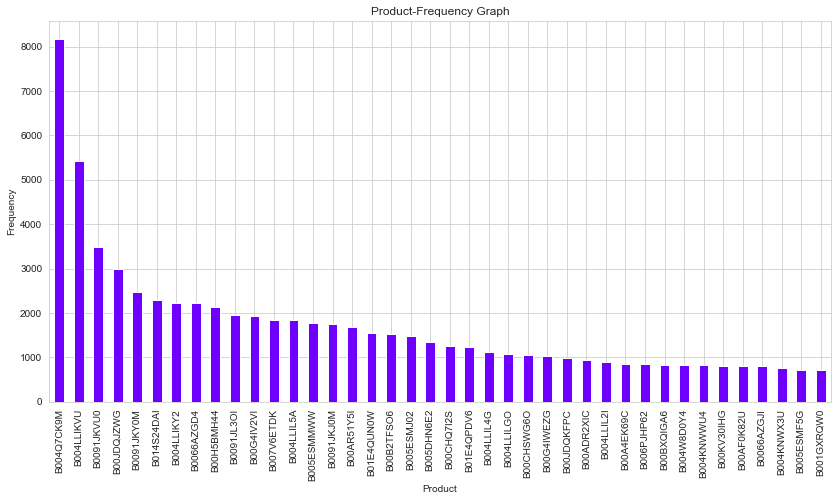

In [44]:
product_freq_graph(df)

In [45]:
df.corr()

,rating,verified
rating,1.000000,0.166299
verified,0.166299,1.000000


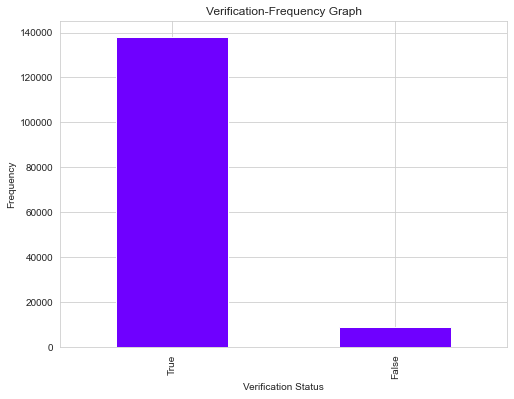

In [46]:
verified_accounts_graph(df)

In [47]:
df_verify = df.dropna()

In [48]:
df_verify.shape

(6341, 6)

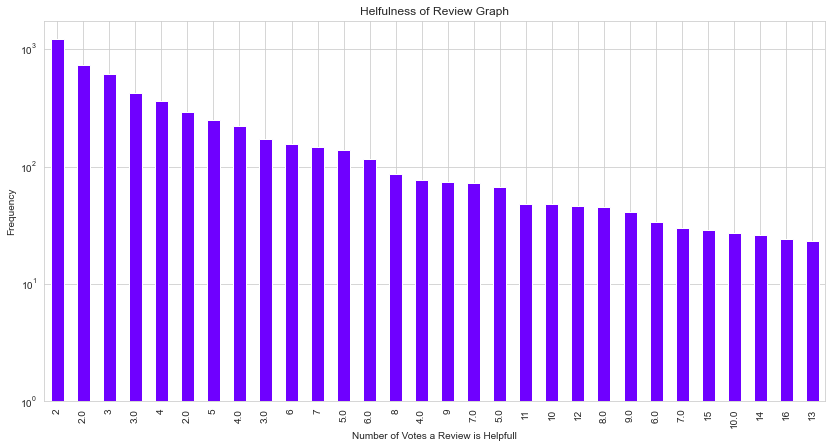

In [49]:
vote_helpfulness_graph(df)

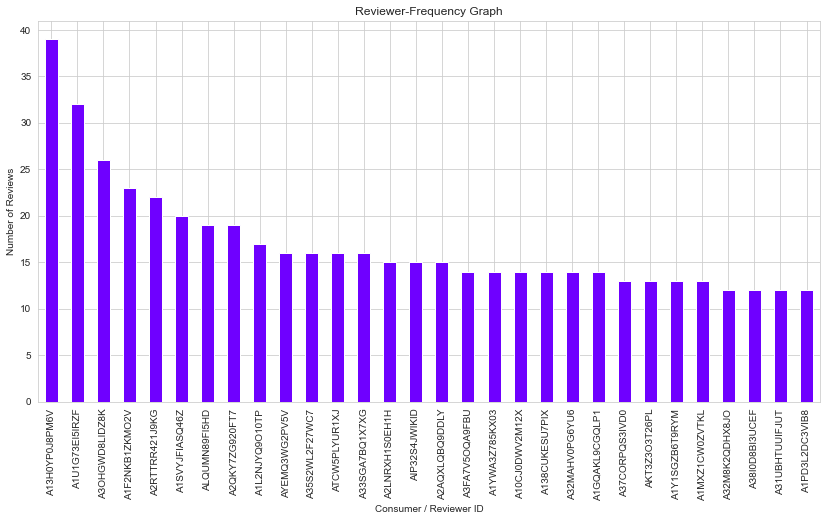

In [50]:
most_frequent_users_graph(df)

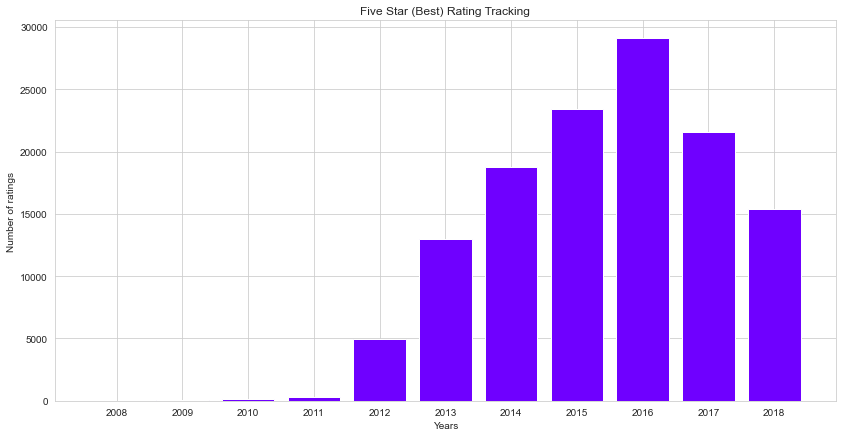

In [51]:
five_star_rating_graph()

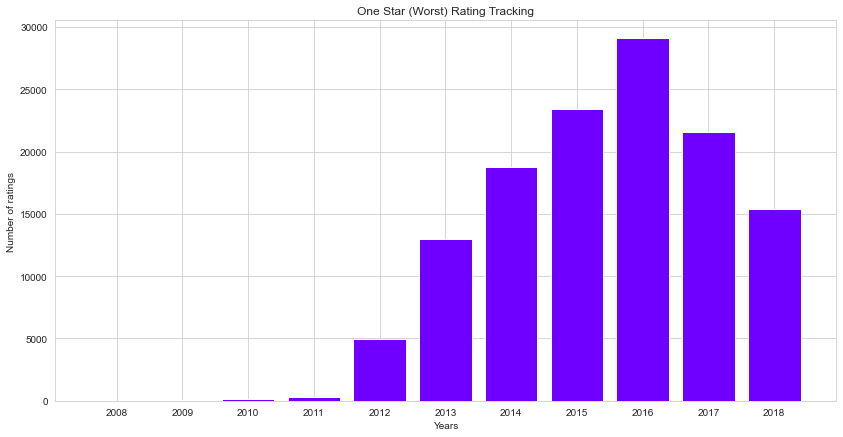

In [52]:
one_star_rating_graph()

# _All Beauty_

In [53]:
df = pd.read_csv('E:\\amazon-eda-datasets\\All_Beauty.csv')

In [54]:
df.head(2)

,rating,verified,reviewerID,product_id,date,vote
0,1,True,A1V6B6TNIC10QE,0143026860,1424304000,NaN
1,4,True,A2F5GHSXFQ0W6J,0143026860,1418860800,NaN


In [55]:
rearrange_columns(df)

In [56]:
df.shape

(362404, 6)

In [57]:
df.head()

,rating,verified,reviewerID,product_id,date,vote
0,1,True,A1V6B6TNIC10QE,0143026860,2015-02-19,NaN
1,4,True,A2F5GHSXFQ0W6J,0143026860,2014-12-18,NaN
2,4,True,A1572GUYS7DGSR,0143026860,2014-08-10,NaN
3,5,True,A1PSGLFK1NSVO,0143026860,2013-03-11,NaN
4,5,True,A6IKXKZMTKGSC,0143026860,2011-12-25,5


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362404 entries, 0 to 362403
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   rating      362404 non-null  int32         
 1   verified    362404 non-null  bool          
 2   reviewerID  362404 non-null  object        
 3   product_id  362404 non-null  object        
 4   date        362404 non-null  datetime64[ns]
 5   vote        50504 non-null   object        
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 12.8+ MB


In [59]:
print(df.isnull().sum())

rating             0
verified           0
reviewerID         0
product_id         0
date               0
vote          311900
dtype: int64


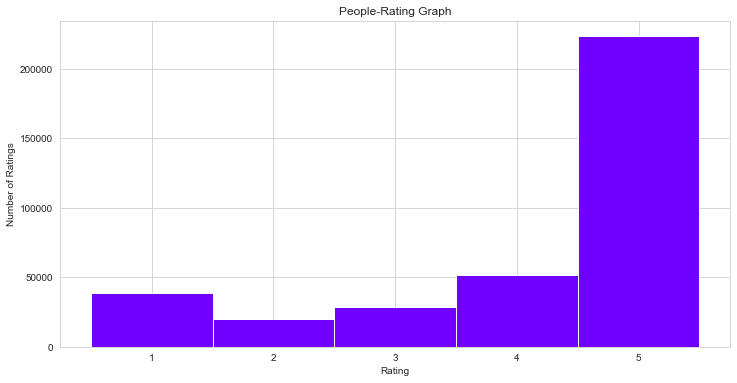

In [60]:
rating_histo_graph(df)

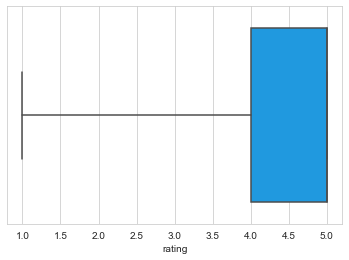

In [61]:
rating_boxplot(df)

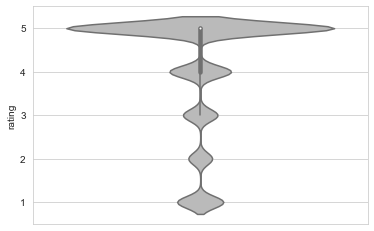

In [62]:
rating_violinplot(df)

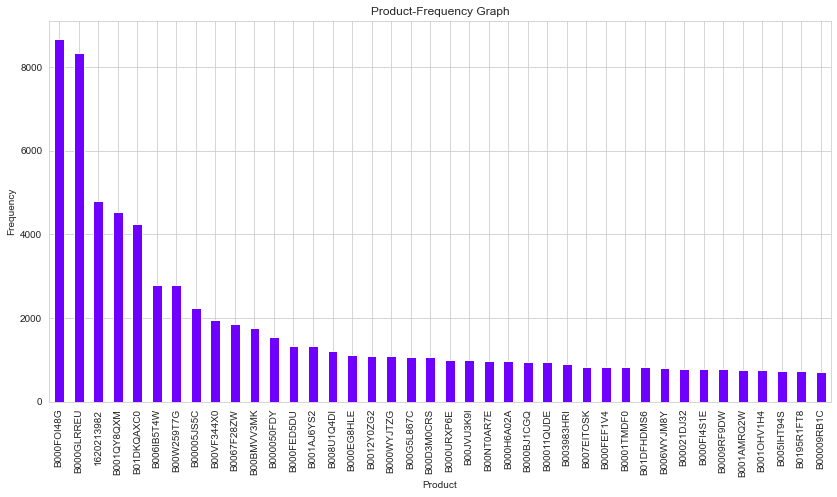

In [63]:
product_freq_graph(df)

In [64]:
df.corr()

,rating,verified
rating,1.000000,0.003056
verified,0.003056,1.000000


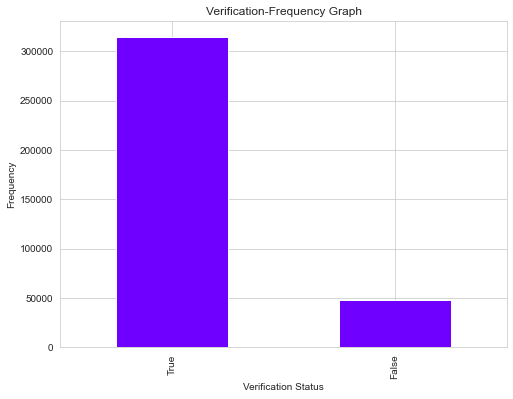

In [65]:
verified_accounts_graph(df)

In [66]:
df_verify = df.dropna()

In [67]:
df_verify.shape

(50504, 6)

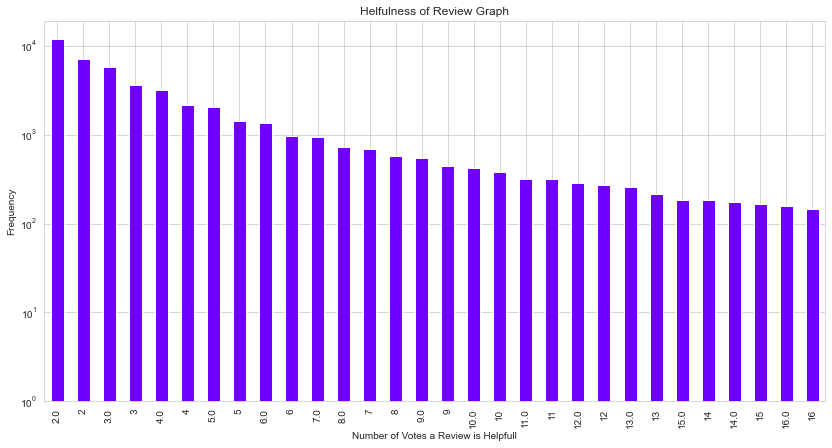

In [68]:
vote_helpfulness_graph(df)

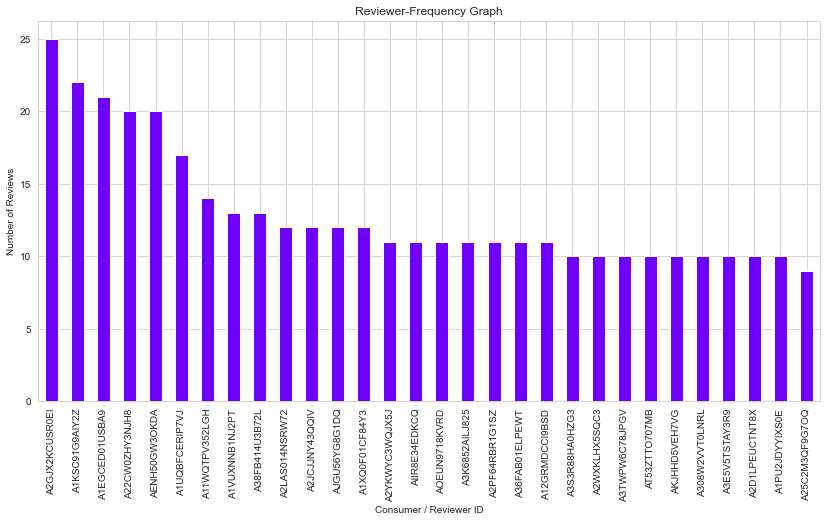

In [69]:
most_frequent_users_graph(df)

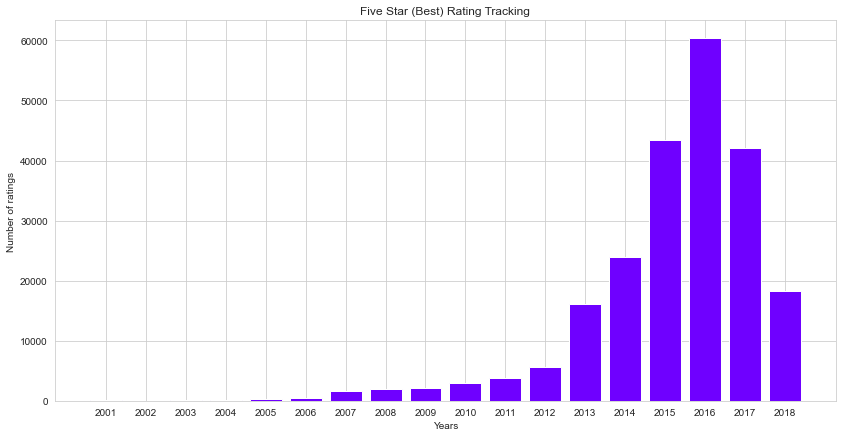

In [70]:
five_star_rating_graph()

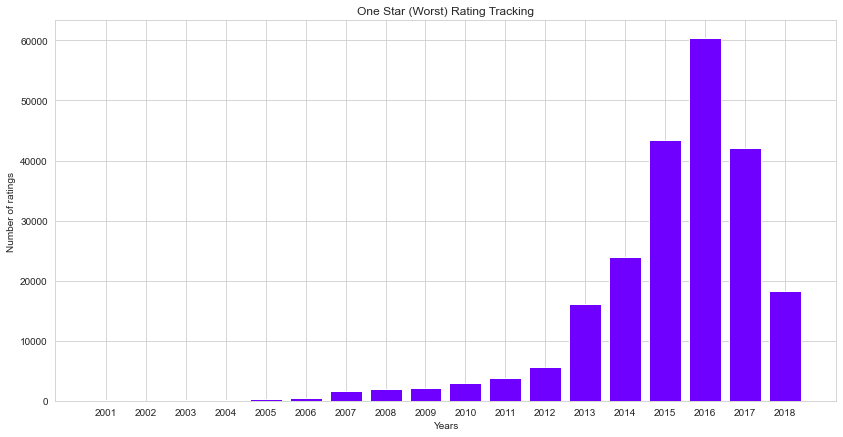

In [71]:
one_star_rating_graph()

# _Appliances_

In [72]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Appliances.csv')

In [73]:
df.head(2)

,rating,vote,verified,reviewerID,product_id,date
0,5,2,False,A3NHUQ33CFH3VM,1118461304,1385510400
1,5,NaN,False,A3SK6VNBQDNBJE,1118461304,1383264000


In [74]:
rearrange_columns(df)

In [75]:
df.shape

(591287, 6)

In [76]:
df.head()

,rating,vote,verified,reviewerID,product_id,date
0,5,2,False,A3NHUQ33CFH3VM,1118461304,2013-11-27
1,5,NaN,False,A3SK6VNBQDNBJE,1118461304,2013-11-01
2,5,NaN,False,A3SOFHUR27FO3K,1118461304,2013-10-10
3,5,NaN,False,A1HOG1PYCAE157,1118461304,2013-10-09
4,5,10,False,A26JGAM6GZMM4V,1118461304,2013-09-07


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591287 entries, 0 to 591286
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   rating      591287 non-null  int32         
 1   vote        61629 non-null   object        
 2   verified    591287 non-null  bool          
 3   reviewerID  591287 non-null  object        
 4   product_id  591287 non-null  object        
 5   date        591287 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 20.9+ MB


In [78]:
print(df.isnull().sum())

rating             0
vote          529658
verified           0
reviewerID         0
product_id         0
date               0
dtype: int64


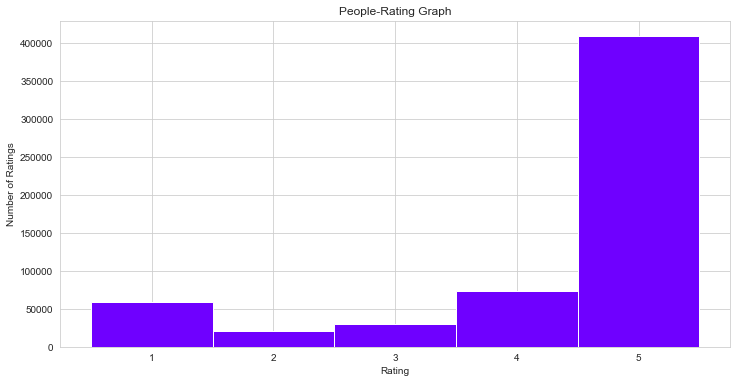

In [79]:
rating_histo_graph(df)

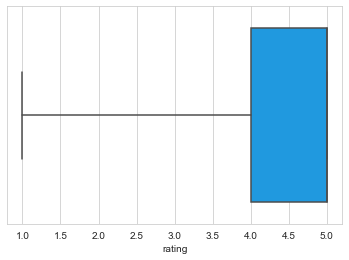

In [80]:
rating_boxplot(df)

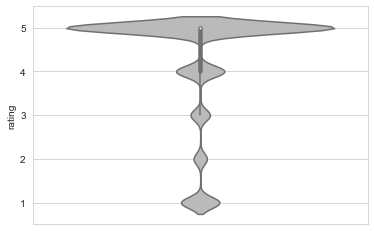

In [81]:
rating_violinplot(df)

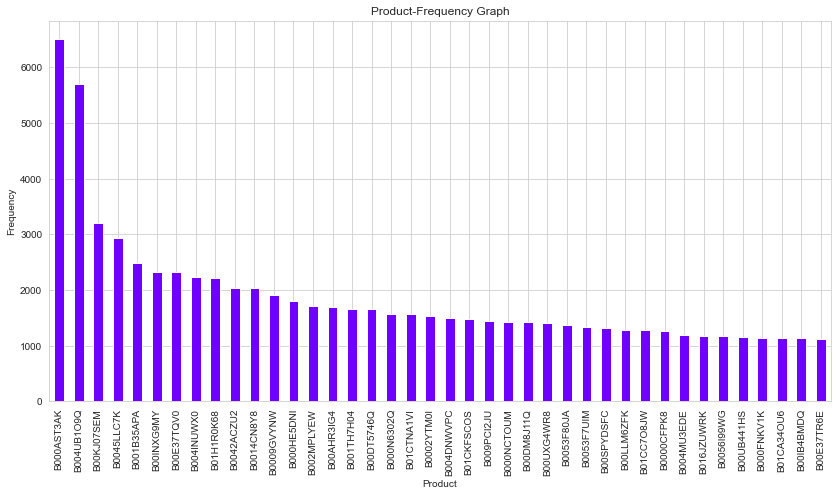

In [82]:
product_freq_graph(df)

In [83]:
df.corr()

,rating,verified
rating,1.000000,0.207605
verified,0.207605,1.000000


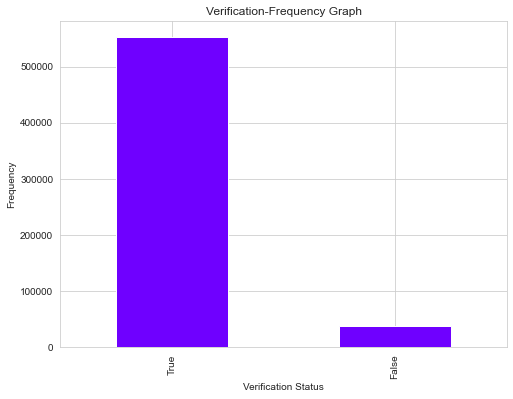

In [84]:
verified_accounts_graph(df)

In [85]:
df_verify = df.dropna()

In [86]:
df_verify.shape

(61629, 6)

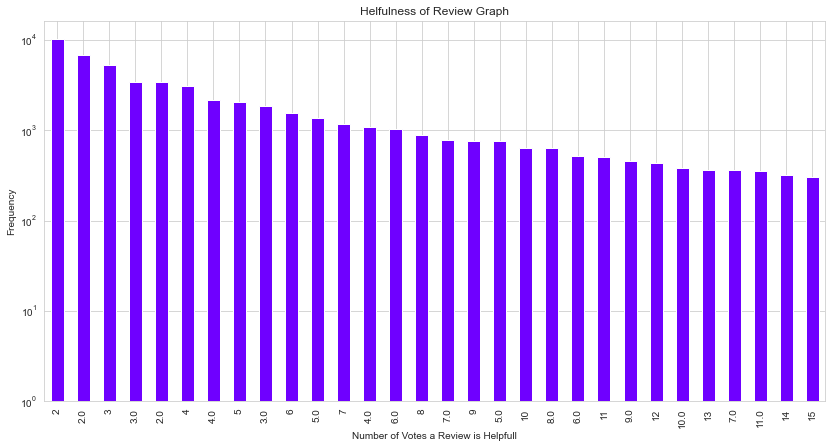

In [87]:
vote_helpfulness_graph(df)

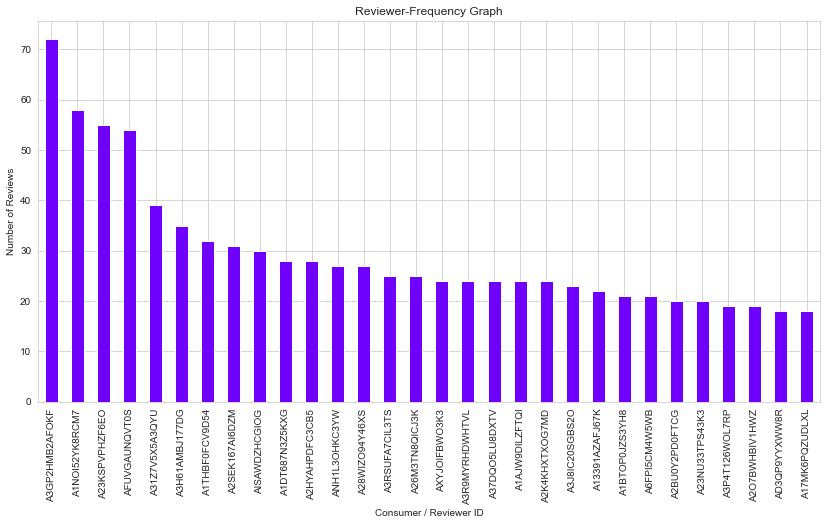

In [88]:
most_frequent_users_graph(df)

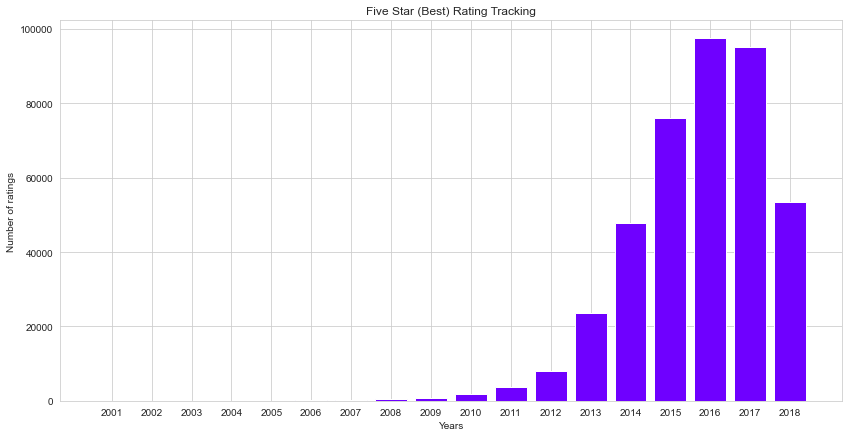

In [89]:
five_star_rating_graph()

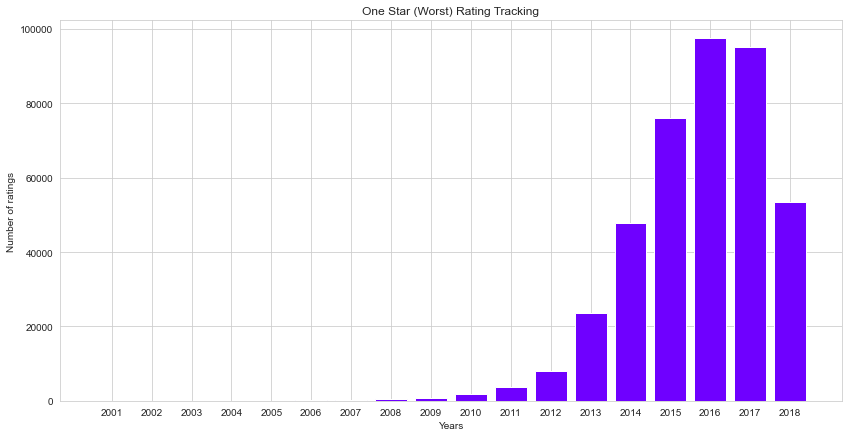

In [90]:
one_star_rating_graph()

# _Software_

In [91]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Software.csv')

In [92]:
df.head(2)

,rating,verified,reviewerID,product_id,date,vote
0,4,True,A240ORQ2LF9LUI,0077613252,1394496000,NaN
1,4,True,A1YCCU0YRLS0FE,0077613252,1393113600,NaN


In [95]:
rearrange_columns(df)

In [96]:
df.shape

(450882, 6)

In [97]:
df.head()

,rating,verified,reviewerID,product_id,date,vote
0,4,True,A240ORQ2LF9LUI,0077613252,2014-03-11,NaN
1,4,True,A1YCCU0YRLS0FE,0077613252,2014-02-23,NaN
2,1,True,A1BJHRQDYVAY2J,0077613252,2014-02-17,7
3,3,True,APRDVZ6QBIQXT,0077613252,2014-02-17,3
4,5,False,A2JZTTBSLS1QXV,0077775473,2013-10-14,NaN


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450882 entries, 0 to 450881
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   rating      450882 non-null  int32         
 1   verified    450882 non-null  bool          
 2   reviewerID  450882 non-null  object        
 3   product_id  450882 non-null  object        
 4   date        450882 non-null  datetime64[ns]
 5   vote        124289 non-null  object        
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 15.9+ MB


In [99]:
print(df.isnull().sum())

rating             0
verified           0
reviewerID         0
product_id         0
date               0
vote          326593
dtype: int64


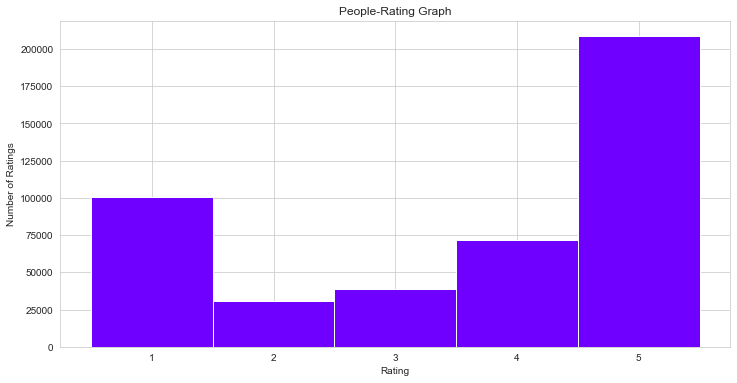

In [100]:
rating_histo_graph(df)

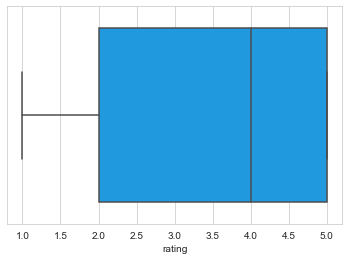

In [101]:
rating_boxplot(df)

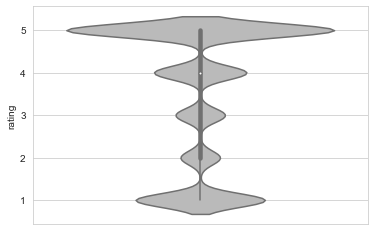

In [102]:
rating_violinplot(df)

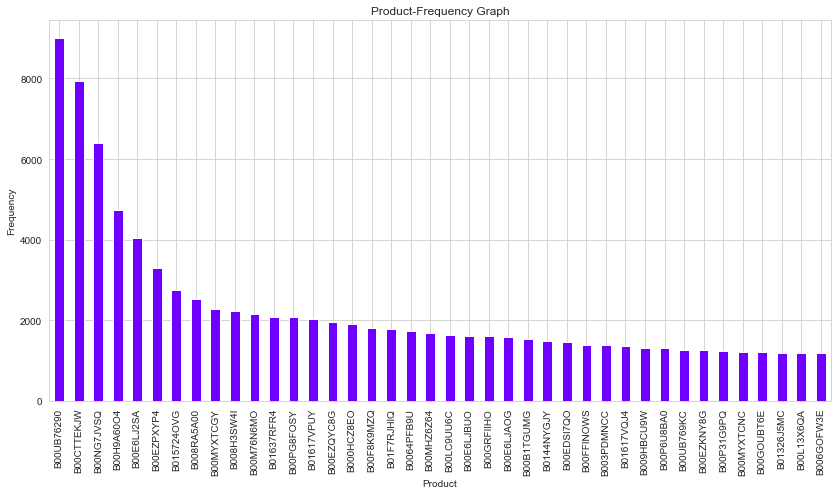

In [103]:
product_freq_graph(df)

In [104]:
df.corr()

,rating,verified
rating,1.000000,0.153907
verified,0.153907,1.000000


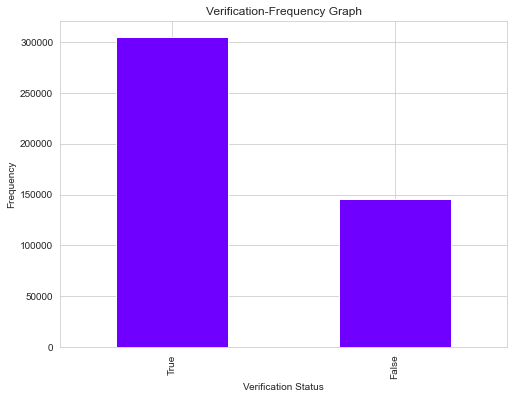

In [105]:
verified_accounts_graph(df)

In [106]:
df_verify = df.dropna()

In [107]:
df_verify.shape

(124289, 6)

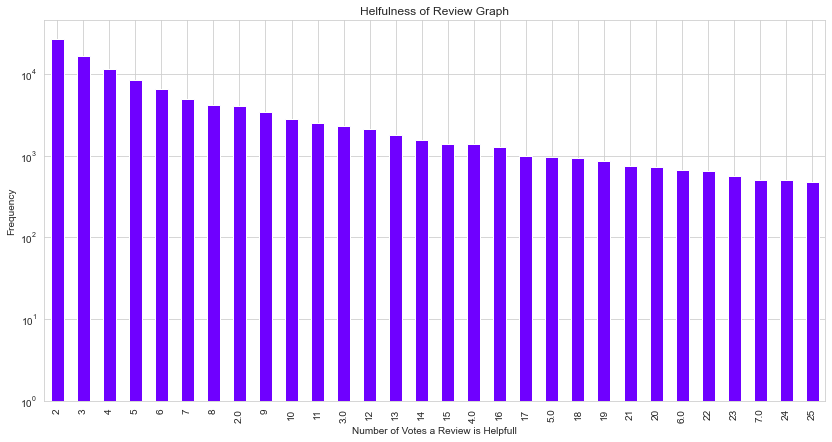

In [108]:
vote_helpfulness_graph(df)

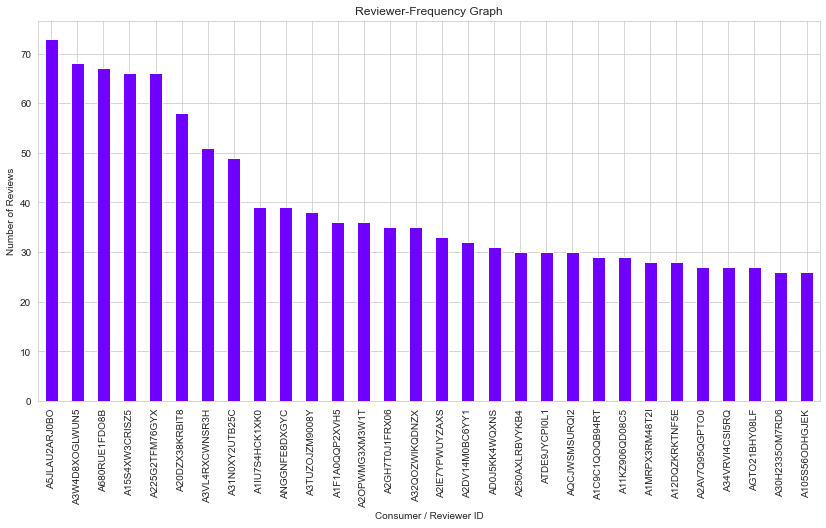

In [109]:
most_frequent_users_graph(df)

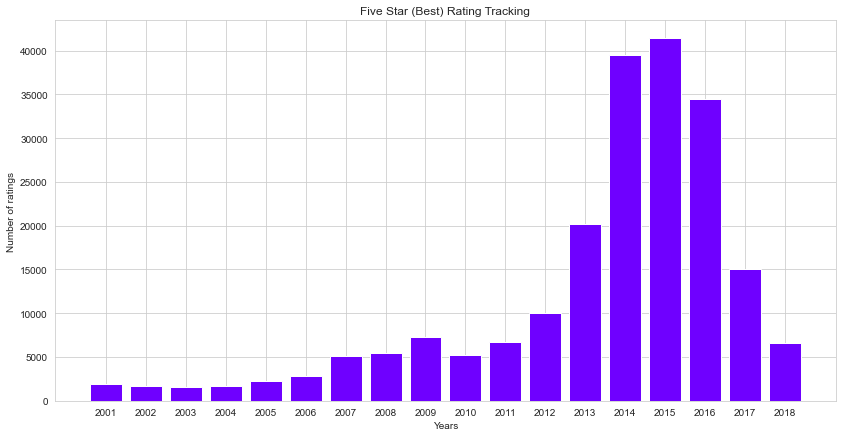

In [110]:
five_star_rating_graph()

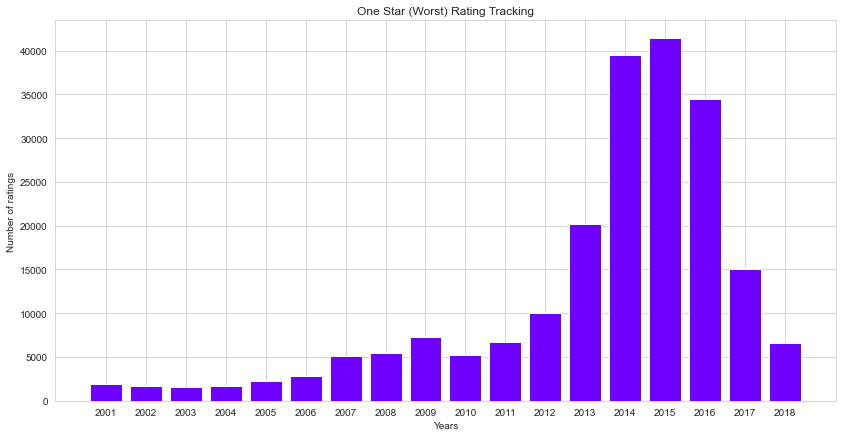

In [111]:
one_star_rating_graph()

# _Amazon Fashion_

In [112]:
df = pd.read_csv('E:\\amazon-eda-datasets\\AMAZON_FASHION.csv')

In [113]:
df.head(2)

,rating,verified,reviewerID,product_id,date,vote
0,5,True,A1D4G1SNUZWQOT,7106116521,1413763200,NaN
1,2,True,A3DDWDH9PX2YX2,7106116521,1411862400,3.0


In [114]:
rearrange_columns(df)

In [115]:
df.shape

(875781, 6)

In [116]:
df.head()

,rating,verified,reviewerID,product_id,date,vote
0,5,True,A1D4G1SNUZWQOT,7106116521,2014-10-20,NaN
1,2,True,A3DDWDH9PX2YX2,7106116521,2014-09-28,3.0
2,4,False,A2MWC41EW7XL15,7106116521,2014-08-25,NaN
3,2,True,A2UH2QQ275NV45,7106116521,2014-08-24,NaN
4,3,False,A89F3LQADZBS5,7106116521,2014-07-27,NaN


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875781 entries, 0 to 875780
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   rating      875781 non-null  int32         
 1   verified    875781 non-null  bool          
 2   reviewerID  875781 non-null  object        
 3   product_id  875781 non-null  object        
 4   date        875781 non-null  datetime64[ns]
 5   vote        79335 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int32(1), object(2)
memory usage: 30.9+ MB


In [118]:
print(df.isnull().sum())

rating             0
verified           0
reviewerID         0
product_id         0
date               0
vote          796446
dtype: int64


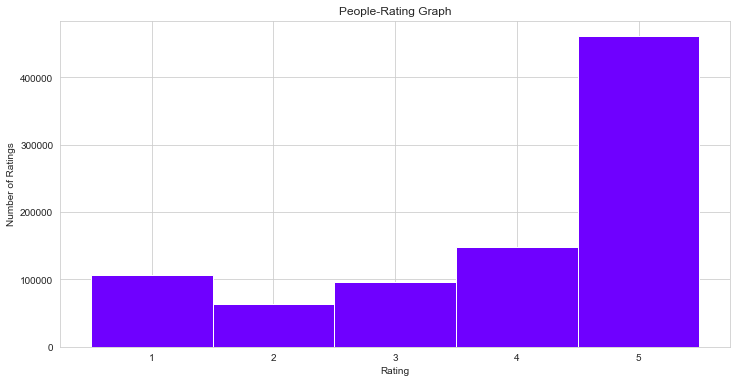

In [119]:
rating_histo_graph(df)

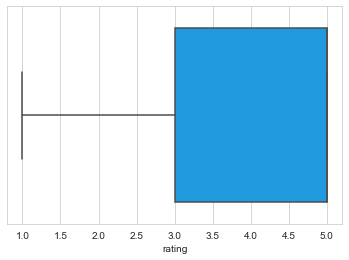

In [120]:
rating_boxplot(df)

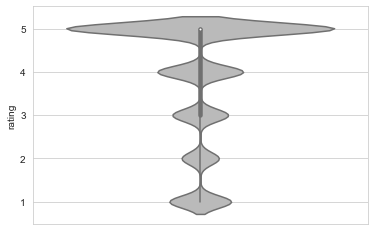

In [121]:
rating_violinplot(df)

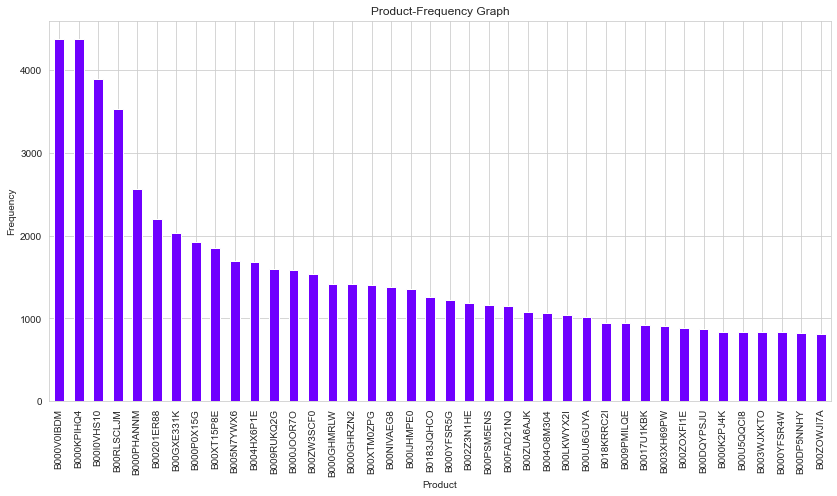

In [122]:
product_freq_graph(df)

In [123]:
df.corr()

,rating,verified,vote
rating,1.000000,-0.007457,0.024569
verified,-0.007457,1.000000,-0.021576
vote,0.024569,-0.021576,1.000000


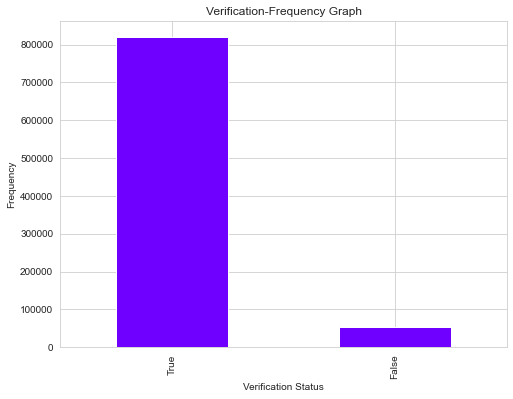

In [124]:
verified_accounts_graph(df)

In [125]:
df_verify = df.dropna()

In [126]:
df_verify.shape

(79335, 6)

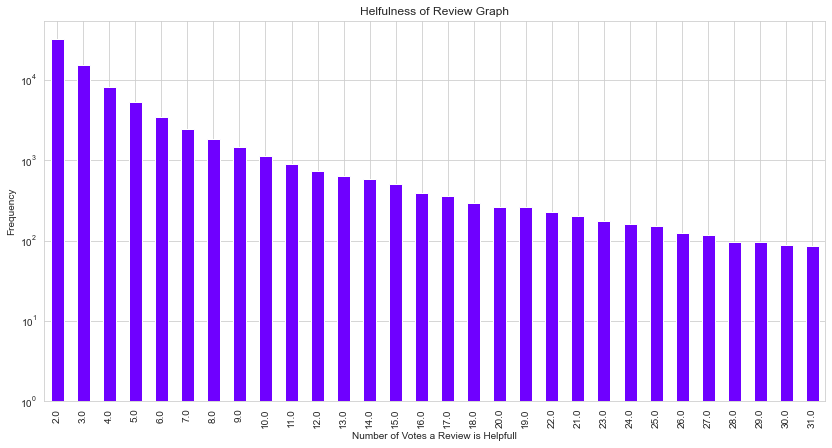

In [127]:
vote_helpfulness_graph(df)

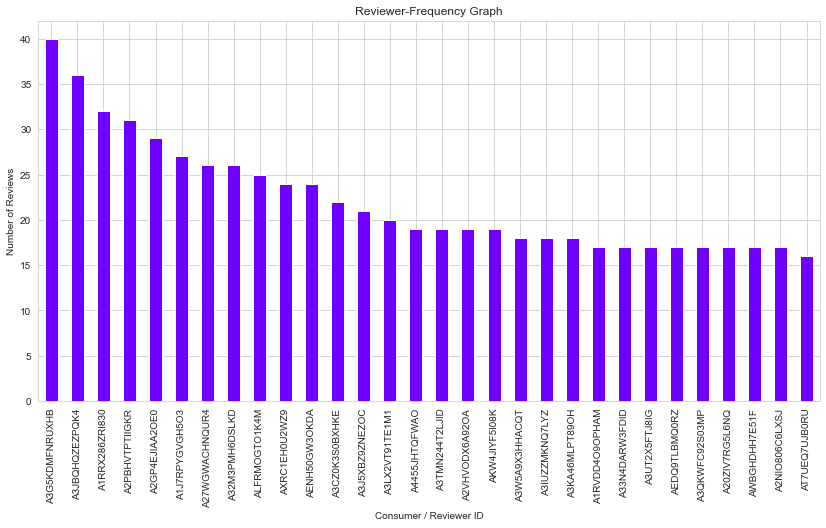

In [128]:
most_frequent_users_graph(df)

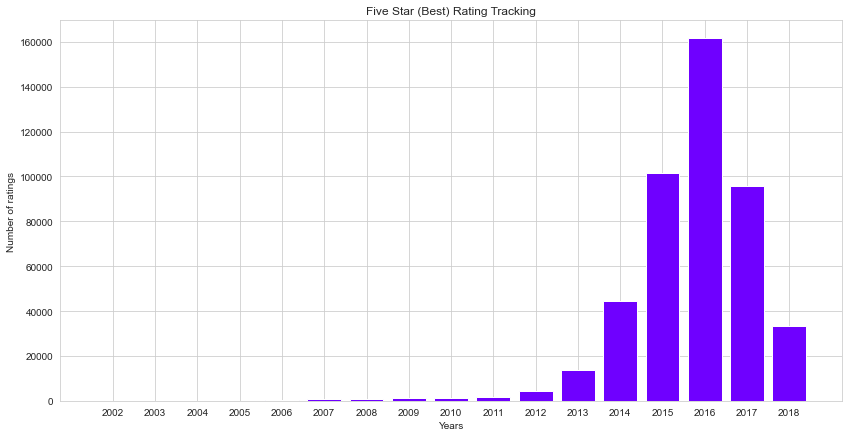

In [129]:
five_star_rating_graph()

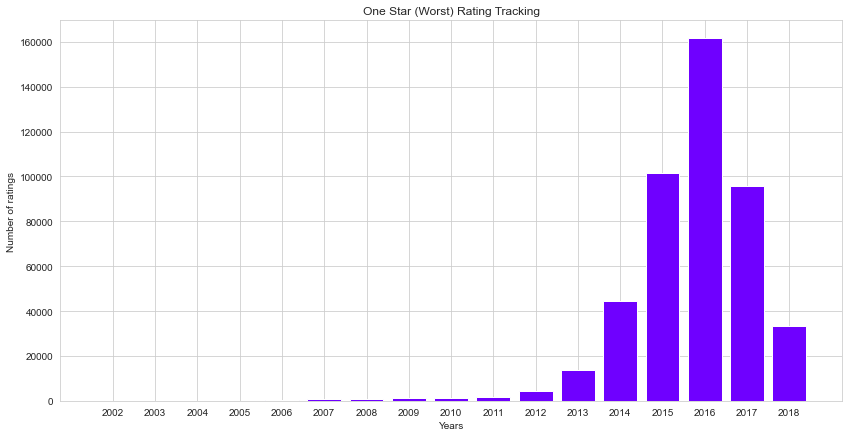

In [130]:
one_star_rating_graph()

# _Digital Music_

In [131]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Digital_Music.csv')

In [132]:
df.head(2)

,rating,verified,reviewerID,product_id,date,vote
0,5,True,A1ZCPG3D3HGRSS,0001388703,1387670400,NaN
1,5,True,AC2PL52NKPL29,0001388703,1378857600,NaN


In [133]:
rearrange_columns(df)

In [134]:
df.shape

(1572906, 6)

In [135]:
df.head()

,rating,verified,reviewerID,product_id,date,vote
0,5,True,A1ZCPG3D3HGRSS,0001388703,2013-12-22,NaN
1,5,True,AC2PL52NKPL29,0001388703,2013-09-11,NaN
2,5,True,A1SUZXBDZSDQ3A,0001388703,2013-03-02,NaN
3,5,True,A3A0W7FZXM0IZW,0001388703,2012-12-02,NaN
4,5,False,A12R54MKO17TW0,0001388703,2012-01-07,6.0


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572906 entries, 0 to 1572905
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   rating      1572906 non-null  int32         
 1   verified    1572906 non-null  bool          
 2   reviewerID  1572906 non-null  object        
 3   product_id  1572906 non-null  object        
 4   date        1572906 non-null  datetime64[ns]
 5   vote        124177 non-null   object        
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 55.5+ MB


In [137]:
print(df.isnull().sum())

rating              0
verified            0
reviewerID          0
product_id          0
date                0
vote          1448729
dtype: int64


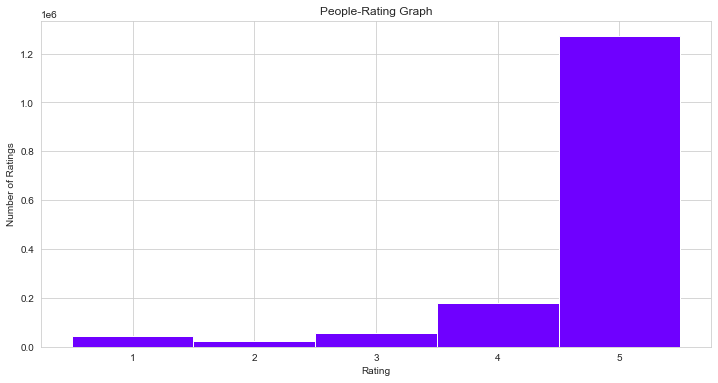

In [138]:
rating_histo_graph(df)

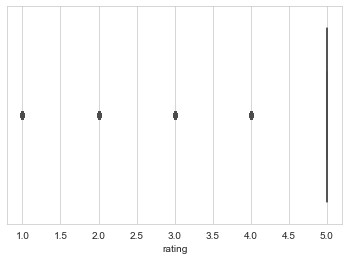

In [139]:
rating_boxplot(df)

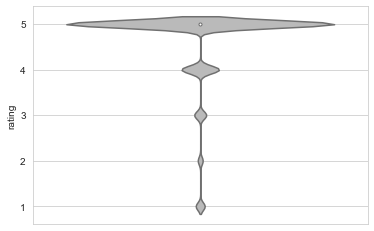

In [140]:
rating_violinplot(df)

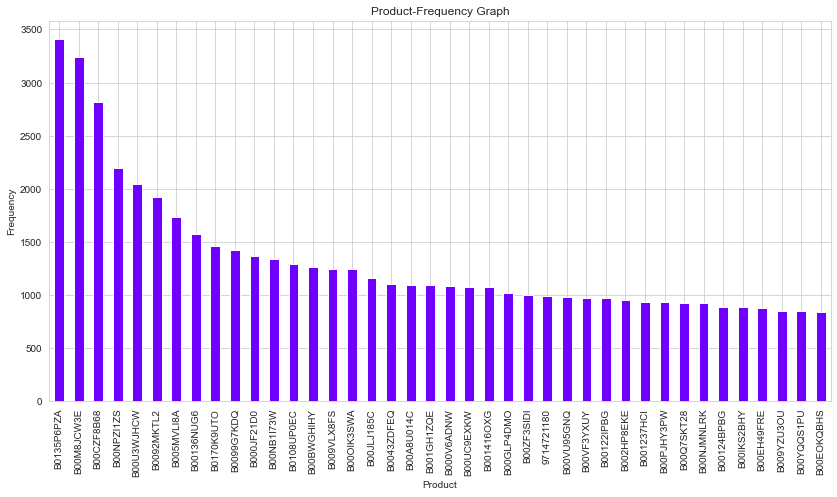

In [141]:
product_freq_graph(df)

In [142]:
df.corr()

,rating,verified
rating,1.000000,0.066766
verified,0.066766,1.000000


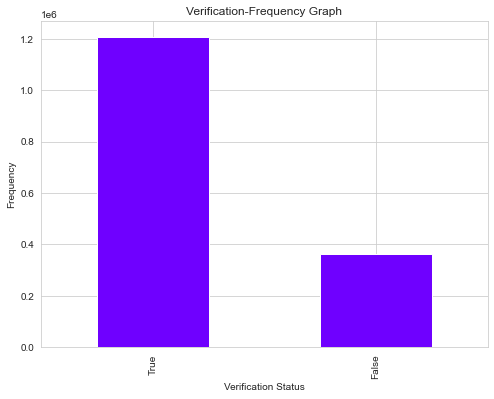

In [143]:
verified_accounts_graph(df)

In [144]:
df_verify = df.dropna()

In [145]:
df_verify.shape

(124177, 6)

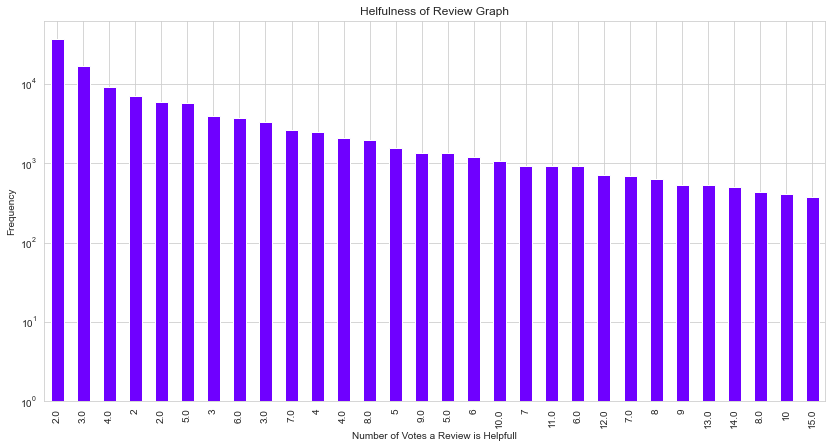

In [146]:
vote_helpfulness_graph(df)

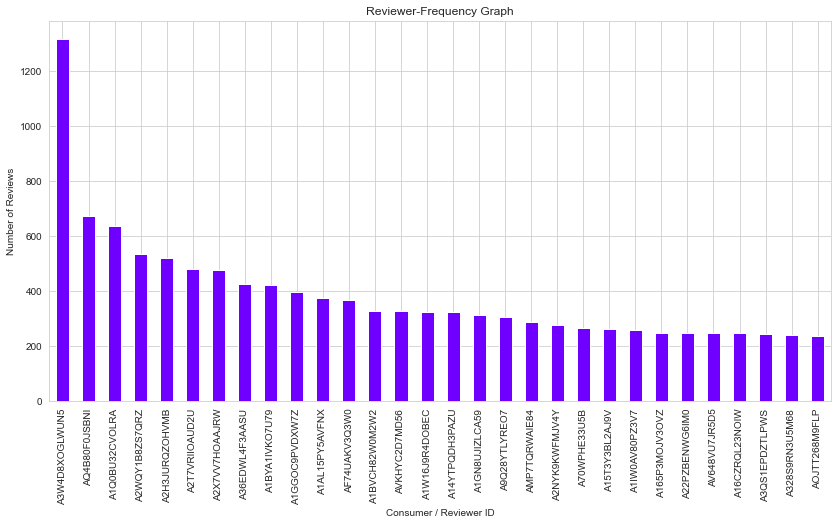

In [147]:
most_frequent_users_graph(df)

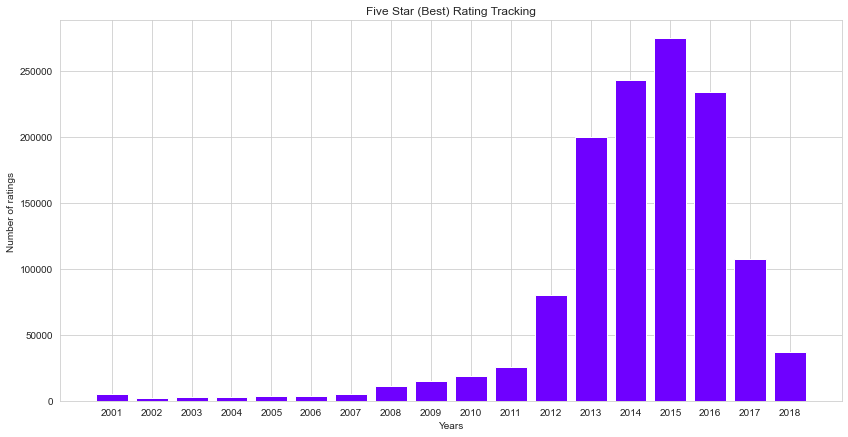

In [148]:
five_star_rating_graph()

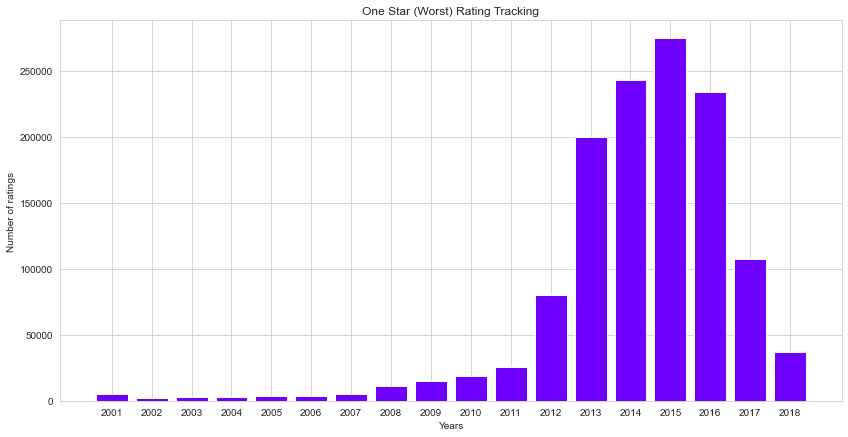

In [149]:
one_star_rating_graph()

# _Industrial and Scientific_

In [150]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Industrial_and_Scientific.csv')

In [151]:
df.head(2)

,rating,verified,reviewerID,product_id,date,vote
0,5,True,A3FANY5GOT5X0W,0176496920,1358899200,NaN
1,5,True,AT6HRPPYOPHMB,0176496920,1352073600,NaN


In [152]:
rearrange_columns(df)

In [153]:
df.shape

(1713766, 6)

In [154]:
df.head()

,rating,verified,reviewerID,product_id,date,vote
0,5,True,A3FANY5GOT5X0W,0176496920,2013-01-23,NaN
1,5,True,AT6HRPPYOPHMB,0176496920,2012-11-05,NaN
2,4,True,A4IX7B38LIN1E,0176496920,2012-10-17,NaN
3,5,True,A12Q4LR8N17AOZ,0176496920,2017-03-29,NaN
4,1,True,A1GJXZZPOZ3OD9,0176496920,2017-03-21,NaN


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1713766 entries, 0 to 1713765
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   rating      int32         
 1   verified    bool          
 2   reviewerID  object        
 3   product_id  object        
 4   date        datetime64[ns]
 5   vote        object        
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 60.5+ MB


In [156]:
print(df.isnull().sum())

rating              0
verified            0
reviewerID          0
product_id          0
date                0
vote          1513111
dtype: int64


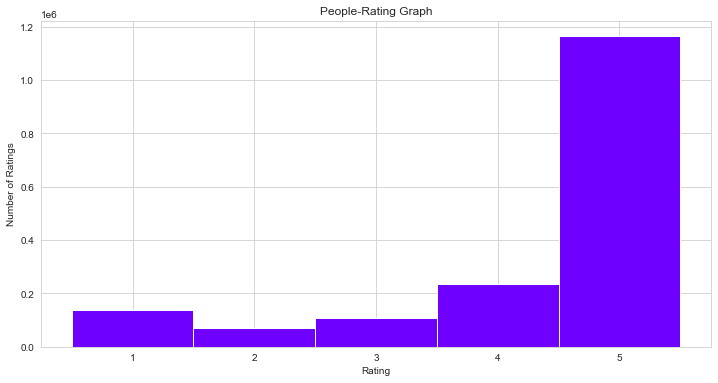

In [157]:
rating_histo_graph(df)

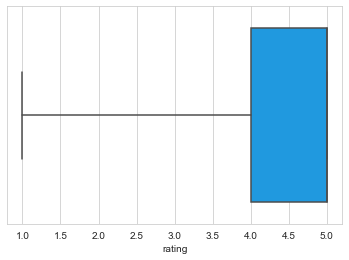

In [158]:
rating_boxplot(df)

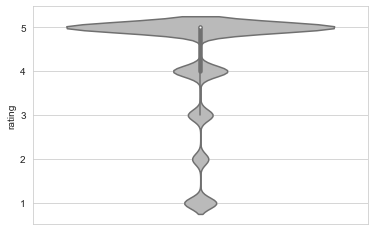

In [159]:
rating_violinplot(df)

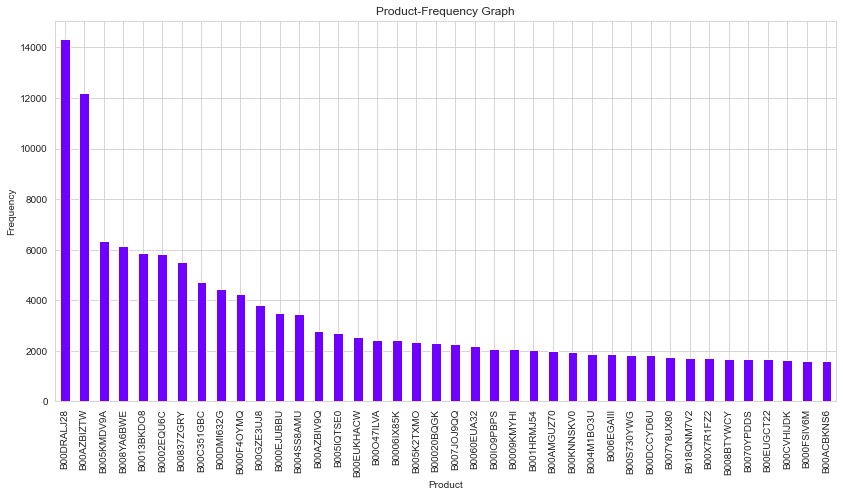

In [160]:
product_freq_graph(df)

In [161]:
df.corr()

,rating,verified
rating,1.000000,0.067278
verified,0.067278,1.000000


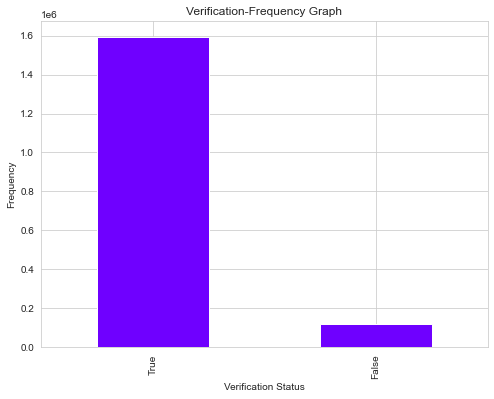

In [162]:
verified_accounts_graph(df)

In [163]:
df_verify = df.dropna()

In [164]:
df_verify.shape

(200655, 6)

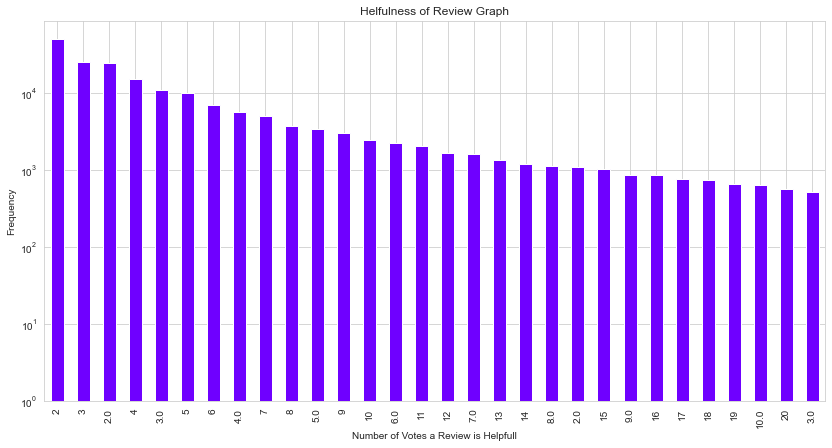

In [165]:
vote_helpfulness_graph(df)

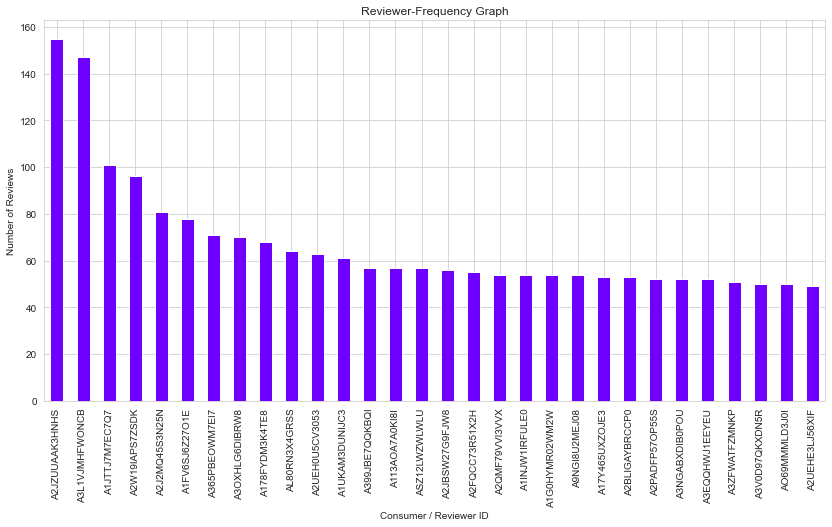

In [166]:
most_frequent_users_graph(df)

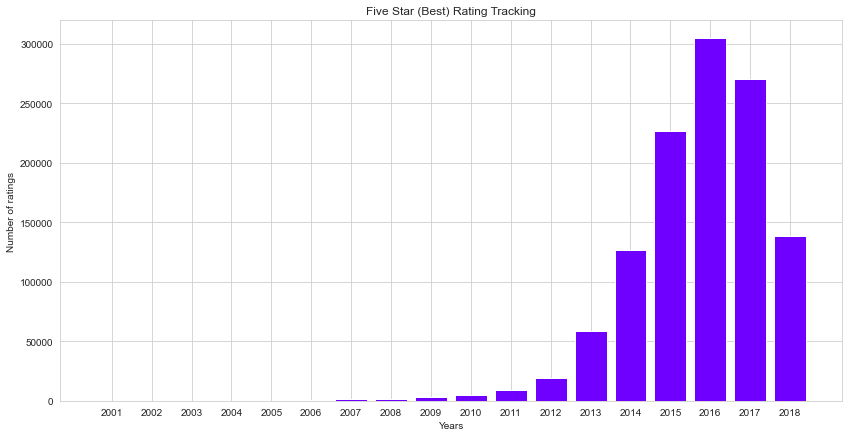

In [167]:
five_star_rating_graph()

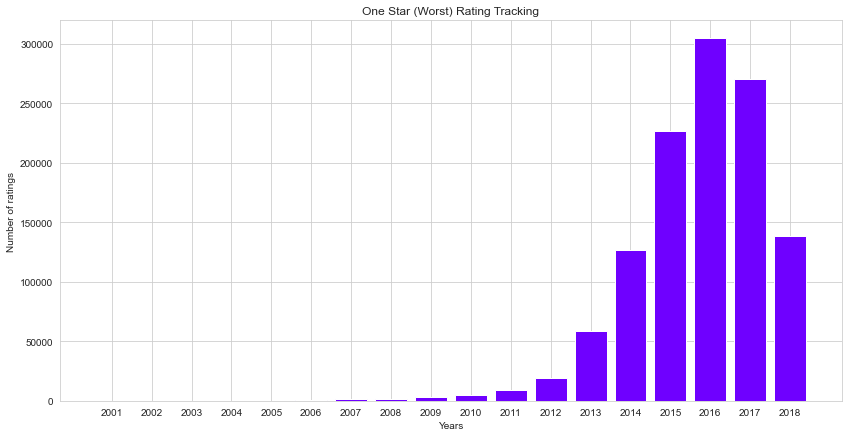

In [168]:
one_star_rating_graph()

# _Musical Instruments_

In [169]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Musical_Instruments.csv')

In [170]:
df.head(2)

,rating,vote,verified,reviewerID,product_id,date
0,5,90.0,False,AXHY24HWOF184,0470536454,1092009600
1,4,2.0,True,A29OWR79AM796H,0470536454,1491436800


In [171]:
rearrange_columns(df)

In [172]:
df.shape

(1473884, 6)

In [173]:
df.head()

,rating,vote,verified,reviewerID,product_id,date
0,5,90.0,False,AXHY24HWOF184,0470536454,2004-08-09
1,4,2.0,True,A29OWR79AM796H,0470536454,2017-04-06
2,5,NaN,True,AUPWU27A7X5F6,0470536454,2017-03-14
3,4,NaN,True,A1N69A47D4JO6K,0470536454,2017-02-14
4,5,NaN,True,AHTIQUMVCGBFJ,0470536454,2017-01-29


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473884 entries, 0 to 1473883
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   rating      1473884 non-null  int32         
 1   vote        236929 non-null   object        
 2   verified    1473884 non-null  bool          
 3   reviewerID  1473884 non-null  object        
 4   product_id  1473884 non-null  object        
 5   date        1473884 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 52.0+ MB


In [175]:
print(df.isnull().sum())

rating              0
vote          1236955
verified            0
reviewerID          0
product_id          0
date                0
dtype: int64


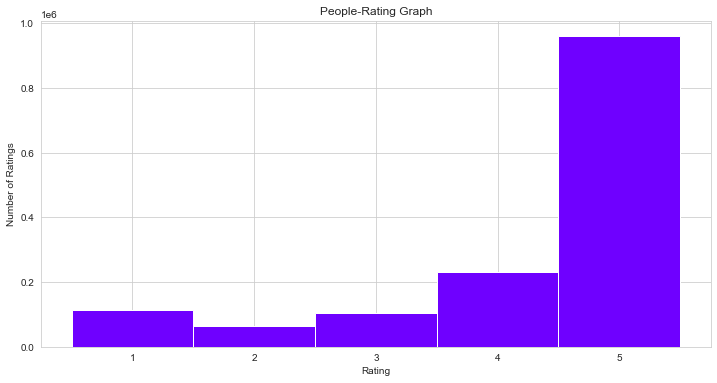

In [176]:
rating_histo_graph(df)

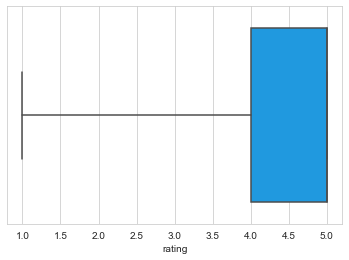

In [177]:
rating_boxplot(df)

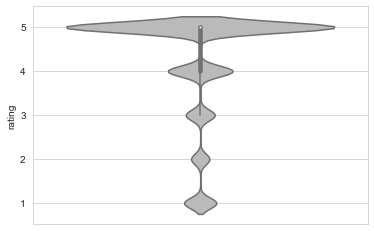

In [178]:
rating_violinplot(df)

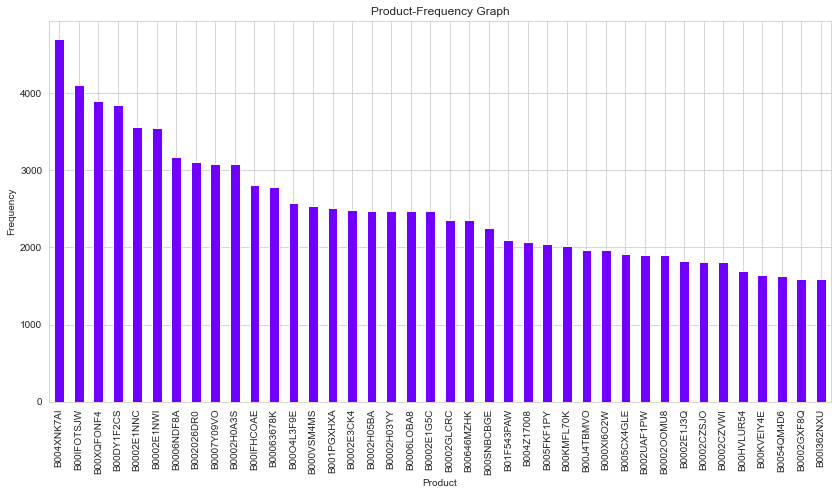

In [179]:
product_freq_graph(df)

In [180]:
df.corr()

,rating,verified
rating,1.000000,0.050732
verified,0.050732,1.000000


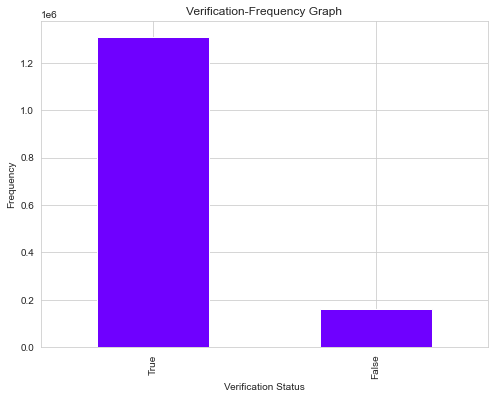

In [181]:
verified_accounts_graph(df)

In [182]:
df_verify = df.dropna()

In [183]:
df_verify.shape

(236929, 6)

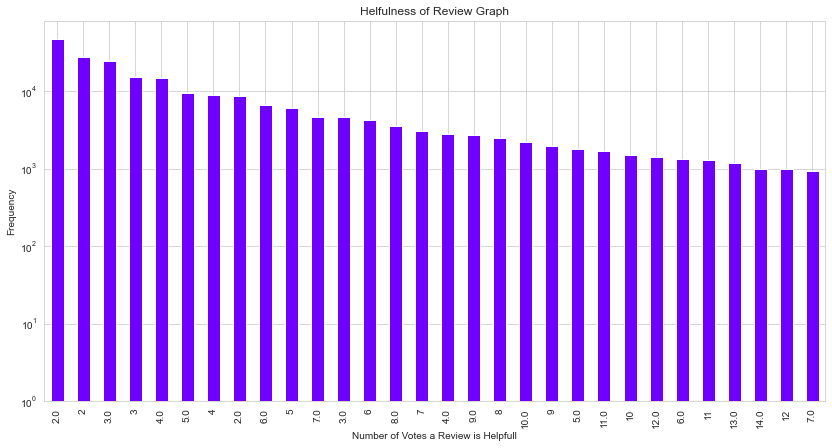

In [184]:
vote_helpfulness_graph(df)

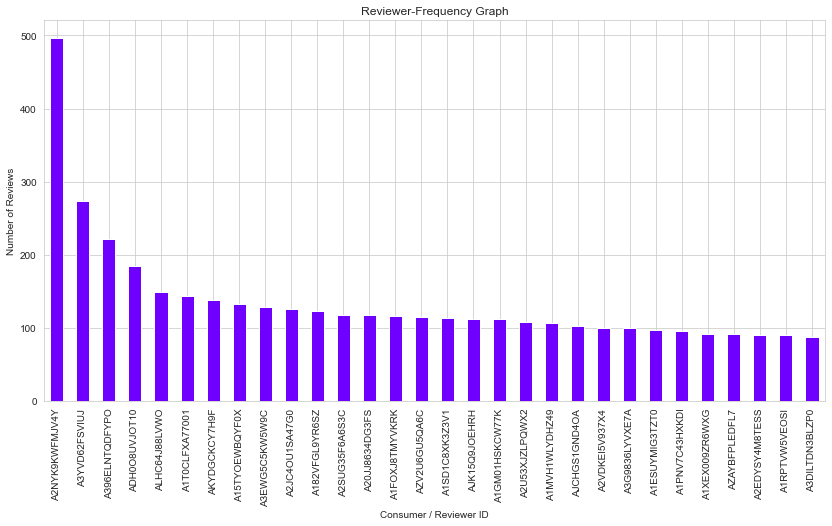

In [185]:
most_frequent_users_graph(df)

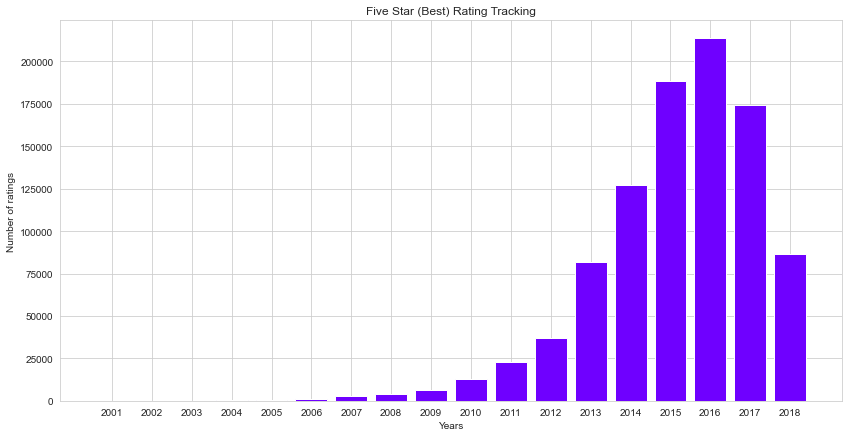

In [186]:
five_star_rating_graph()

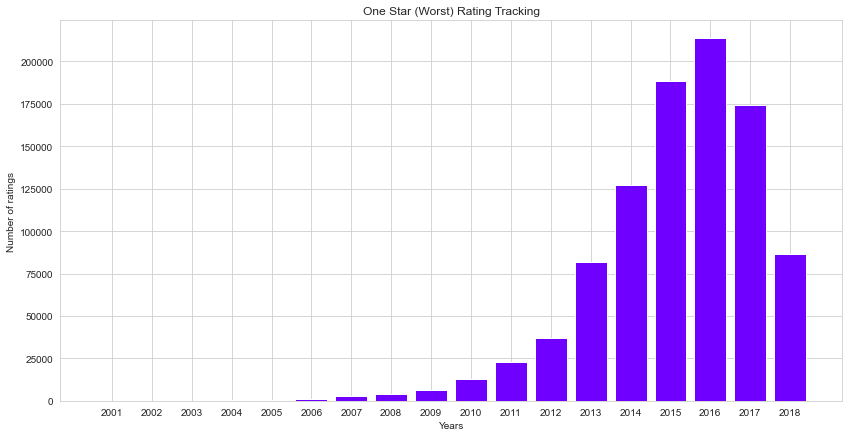

In [187]:
one_star_rating_graph()

# _Video Games_

In [188]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Video_Games.csv')

In [189]:
df.head(2)

,rating,verified,reviewerID,product_id,date,vote
0,1,True,A21ROB4YDOZA5P,0439381673,1402272000,NaN
1,3,True,A3TNZ2Q5E7HTHD,0439381673,1399680000,NaN


In [190]:
rearrange_columns(df)

In [191]:
df.shape

(2553981, 6)

In [192]:
df.head()

,rating,verified,reviewerID,product_id,date,vote
0,1,True,A21ROB4YDOZA5P,0439381673,2014-06-09,NaN
1,3,True,A3TNZ2Q5E7HTHD,0439381673,2014-05-10,NaN
2,4,True,A1OKRM3QFEATQO,0439381673,2014-02-07,15
3,1,True,A2XO1JFCNEYV3T,0439381673,2014-02-07,11
4,4,True,A19WLPIRHD15TH,0439381673,2014-01-16,NaN


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553981 entries, 0 to 2553980
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   rating      int32         
 1   verified    bool          
 2   reviewerID  object        
 3   product_id  object        
 4   date        datetime64[ns]
 5   vote        object        
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 90.1+ MB


In [194]:
print(df.isnull().sum())

rating              0
verified            0
reviewerID          0
product_id          0
date                0
vote          2115506
dtype: int64


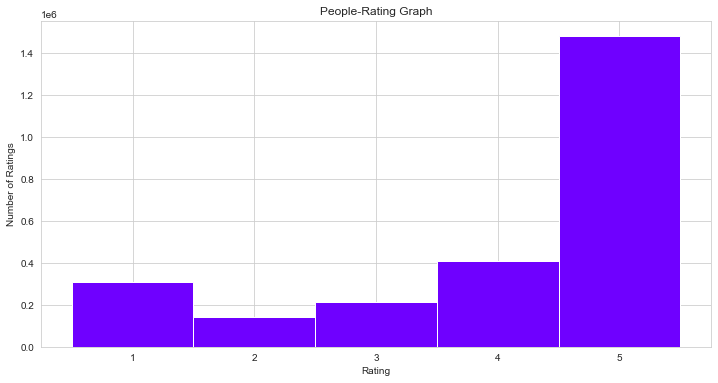

In [195]:
rating_histo_graph(df)

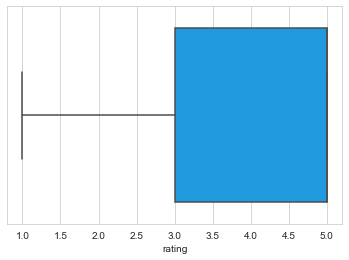

In [196]:
rating_boxplot(df)

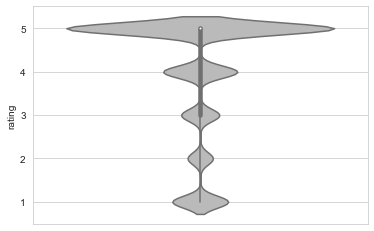

In [197]:
rating_violinplot(df)

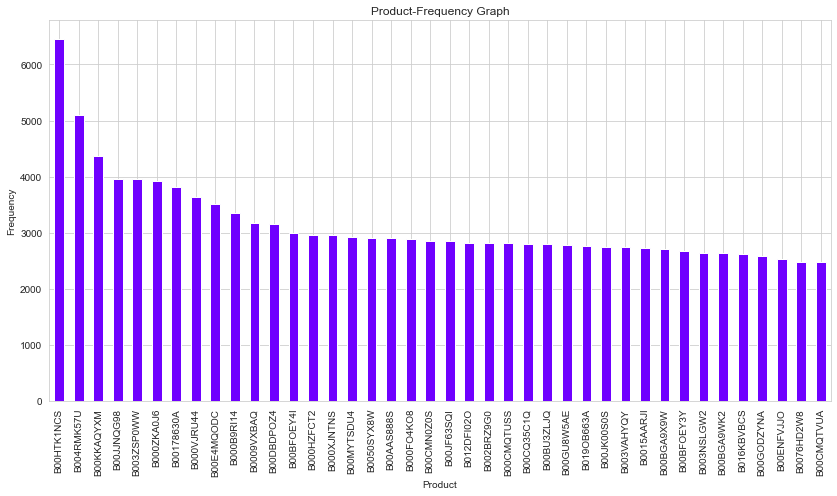

In [198]:
product_freq_graph(df)

In [199]:
df.corr()

,rating,verified
rating,1.000000,0.100447
verified,0.100447,1.000000


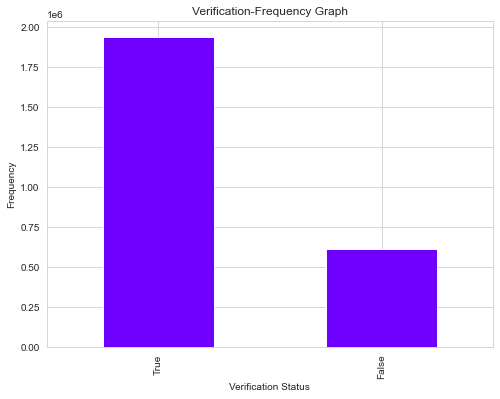

In [200]:
verified_accounts_graph(df)

In [201]:
df_verify = df.dropna()

In [202]:
df_verify.shape

(438475, 6)

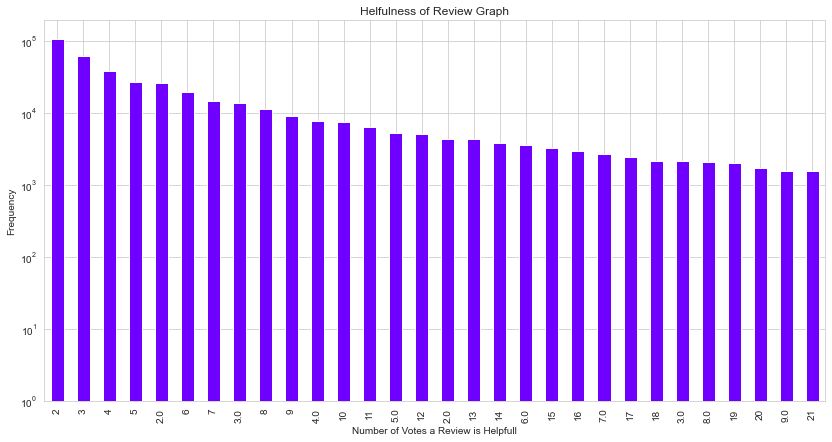

In [203]:
vote_helpfulness_graph(df)

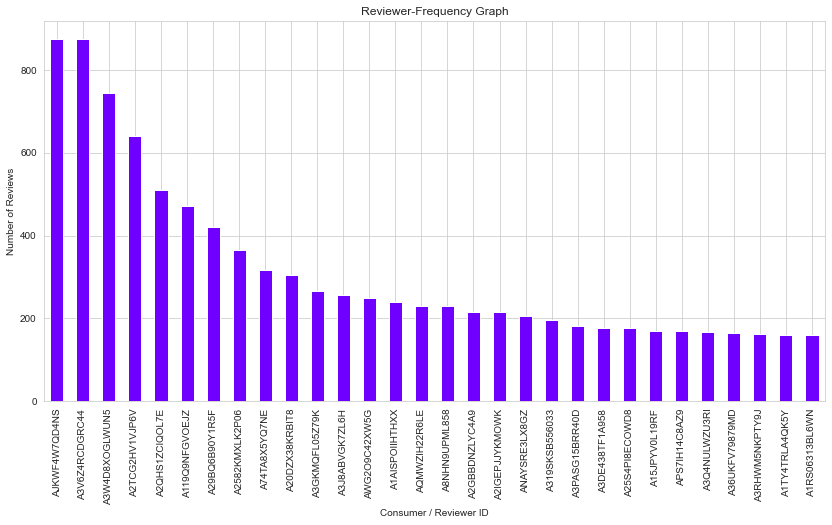

In [204]:
most_frequent_users_graph(df)

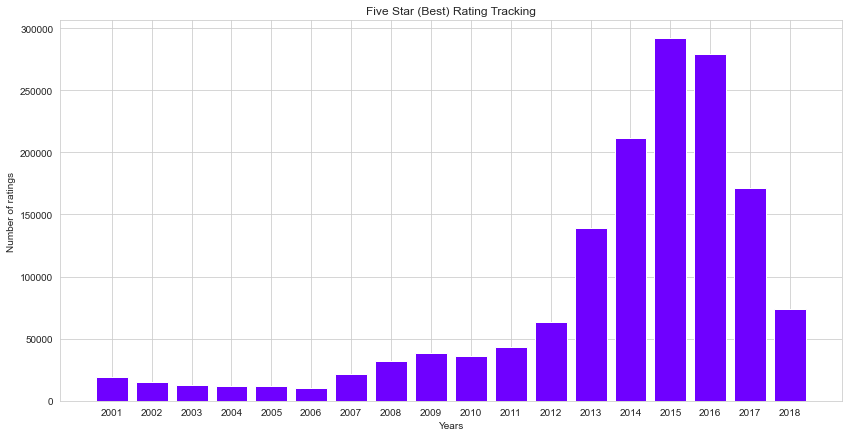

In [205]:
five_star_rating_graph()

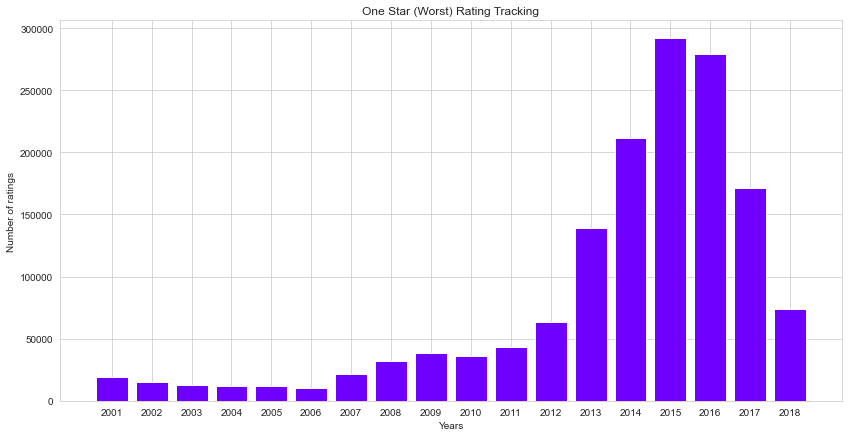

In [206]:
one_star_rating_graph()

# _Grocery and Gourmet Food_

In [207]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Grocery_and_Gourmet_Food.csv')

In [208]:
df.head(2)

,rating,verified,reviewerID,product_id,date,vote
0,5,True,ALP49FBWT4I7V,1888861614,1370304000,NaN
1,4,True,A1KPIZOCLB9FZ8,1888861614,1400803200,NaN


In [209]:
rearrange_columns(df)

In [210]:
df.shape

(5061075, 6)

In [211]:
df.head()

,rating,verified,reviewerID,product_id,date,vote
0,5,True,ALP49FBWT4I7V,1888861614,2013-06-04,NaN
1,4,True,A1KPIZOCLB9FZ8,1888861614,2014-05-23,NaN
2,4,True,A2W0FA06IYAYQE,1888861614,2014-05-09,NaN
3,5,True,A2PTZTCH2QUYBC,1888861614,2014-04-20,NaN
4,4,True,A2VNHGJ59N4Z90,1888861614,2014-04-16,NaN


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5061075 entries, 0 to 5061074
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   rating      int32         
 1   verified    bool          
 2   reviewerID  object        
 3   product_id  object        
 4   date        datetime64[ns]
 5   vote        object        
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 178.6+ MB


In [213]:
print(df.isnull().sum())

rating              0
verified            0
reviewerID          0
product_id          0
date                0
vote          4401897
dtype: int64


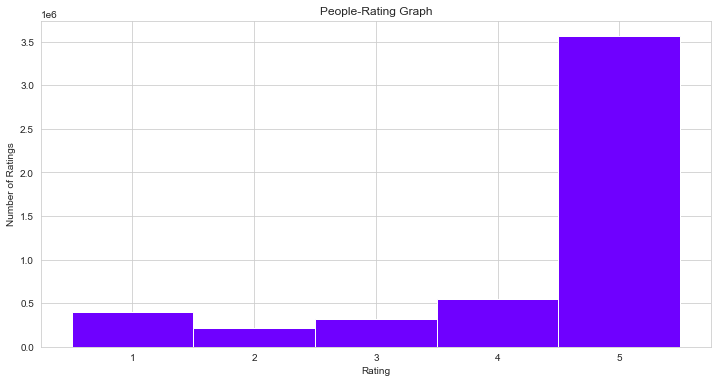

In [214]:
rating_histo_graph(df)

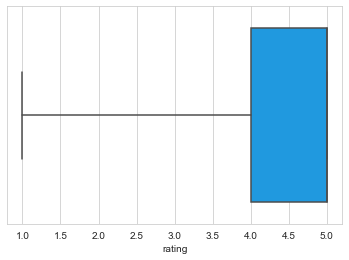

In [215]:
rating_boxplot(df)

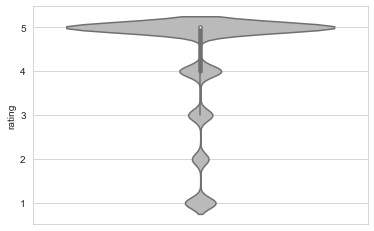

In [216]:
rating_violinplot(df)

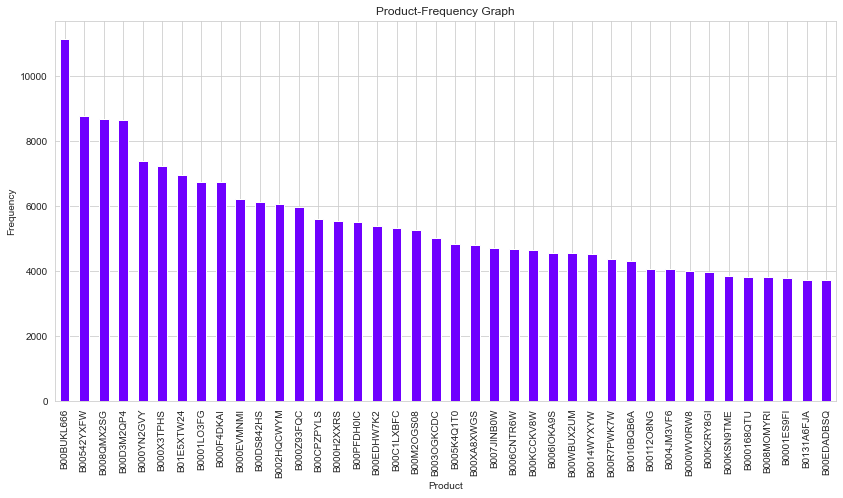

In [217]:
product_freq_graph(df)

In [218]:
df.corr()

,rating,verified
rating,1.000000,0.077347
verified,0.077347,1.000000


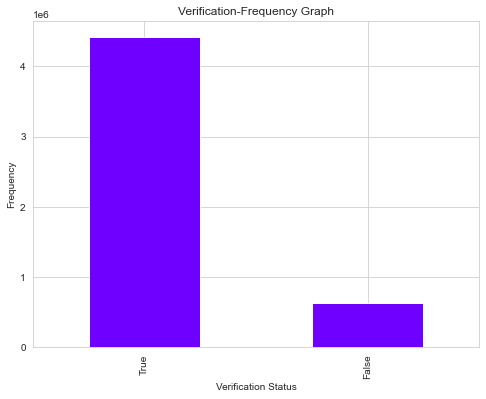

In [219]:
verified_accounts_graph(df)

In [220]:
df_verify = df.dropna()

In [221]:
df_verify.shape

(659178, 6)

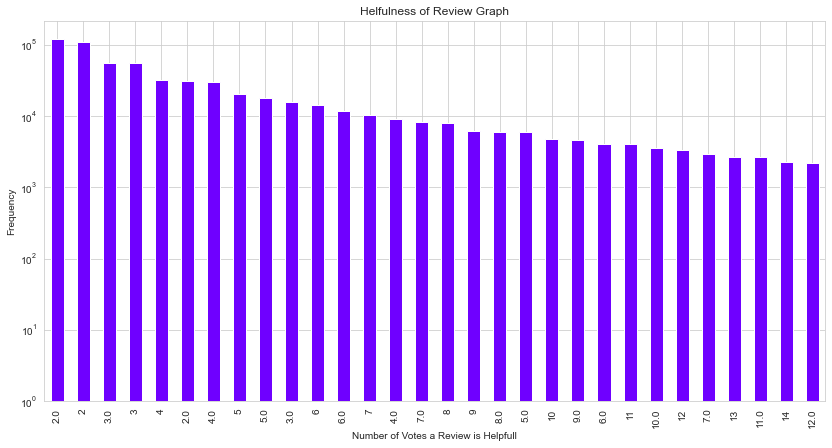

In [222]:
vote_helpfulness_graph(df)

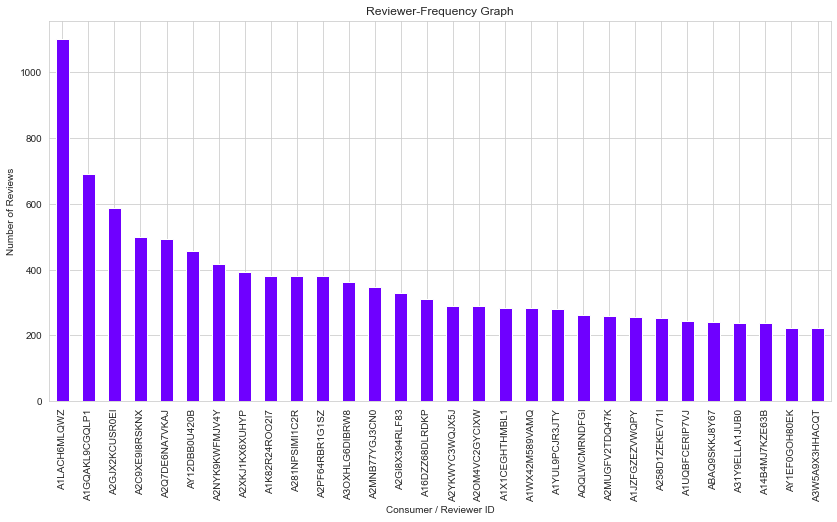

In [223]:
most_frequent_users_graph(df)

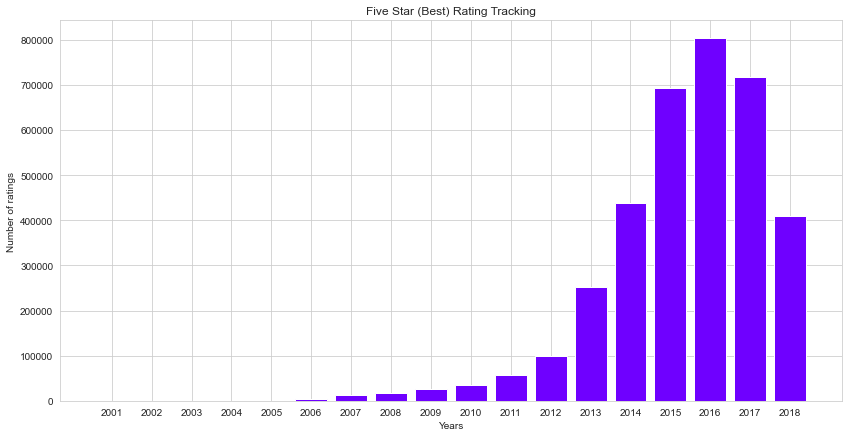

In [224]:
five_star_rating_graph()

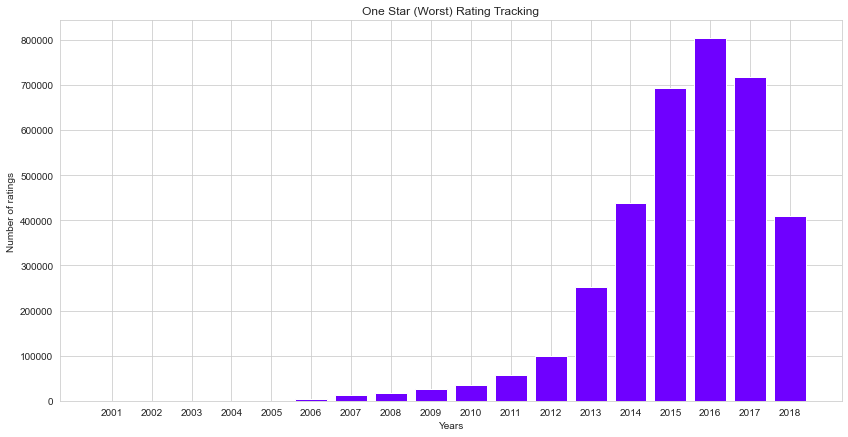

In [225]:
one_star_rating_graph()

# _Office Products_

In [226]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Office_Products.csv')

In [227]:
df.head(2)

,rating,vote,verified,reviewerID,product_id,date
0,3,6.0,False,A2WJLOXXIB7NF3,0140503528,1162512000
1,5,NaN,False,A1RKICUK0GG6VF,0140503528,1147132800


In [228]:
rearrange_columns(df)

In [229]:
df.shape

(5570778, 6)

In [230]:
df.head()

,rating,vote,verified,reviewerID,product_id,date
0,3,6.0,False,A2WJLOXXIB7NF3,0140503528,2006-11-03
1,5,NaN,False,A1RKICUK0GG6VF,0140503528,2006-05-09
2,5,NaN,False,A1QA5E50M398VW,0140503528,2006-03-11
3,5,12.0,False,A3N0HBW8IP8CZQ,0140503528,2001-01-24
4,5,65.0,False,A1K1JW1C5CUSUZ,0140503528,2000-07-30


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570778 entries, 0 to 5570777
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   rating      int32         
 1   vote        object        
 2   verified    bool          
 3   reviewerID  object        
 4   product_id  object        
 5   date        datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 196.6+ MB


In [232]:
print(df.isnull().sum())

rating              0
vote          4944365
verified            0
reviewerID          0
product_id          0
date                0
dtype: int64


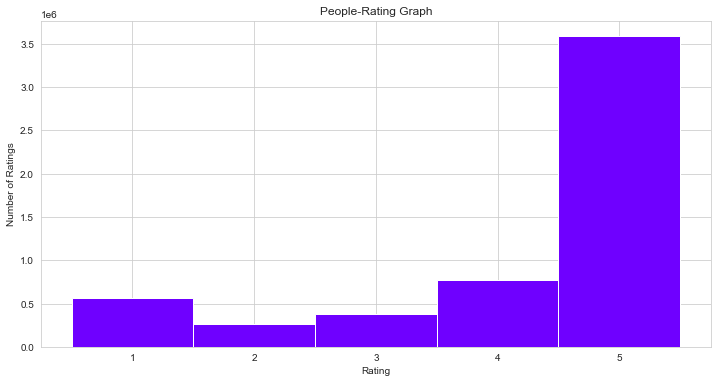

In [233]:
rating_histo_graph(df)

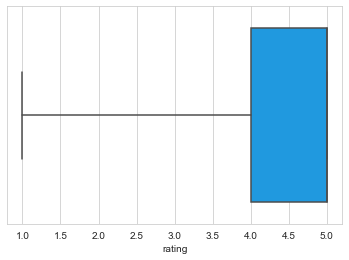

In [234]:
rating_boxplot(df)

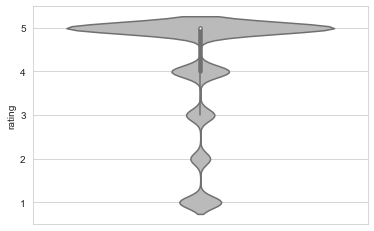

In [235]:
rating_violinplot(df)

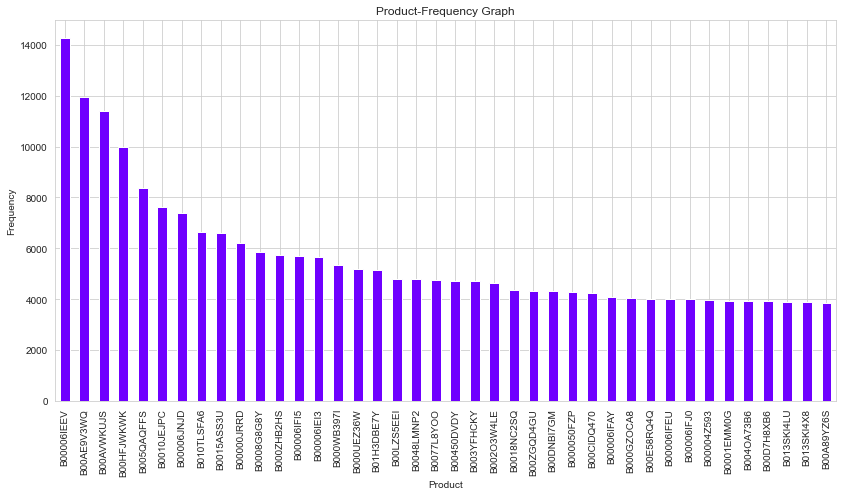

In [236]:
product_freq_graph(df)

In [237]:
df.corr()

,rating,verified
rating,1.000000,0.093827
verified,0.093827,1.000000


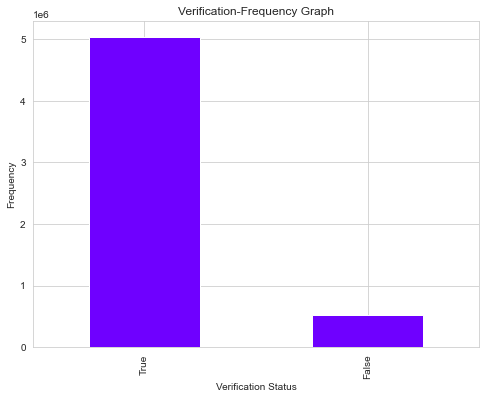

In [238]:
verified_accounts_graph(df)

In [239]:
df_verify = df.dropna()

In [240]:
df_verify.shape

(626413, 6)

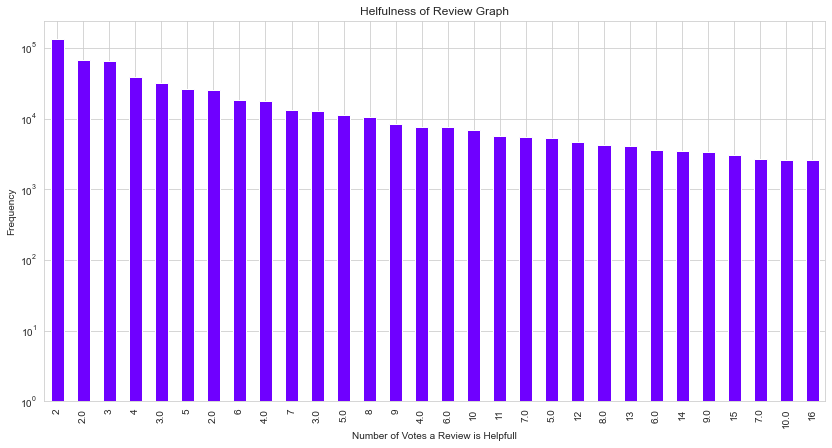

In [241]:
vote_helpfulness_graph(df)

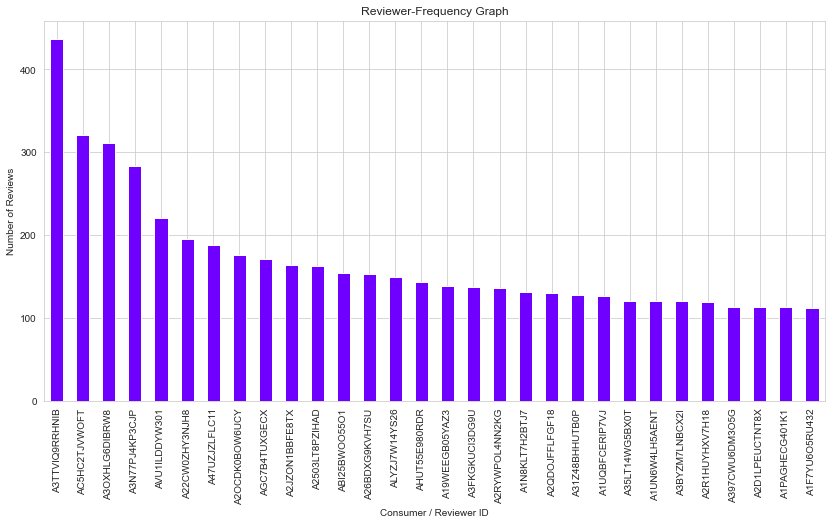

In [242]:
most_frequent_users_graph(df)

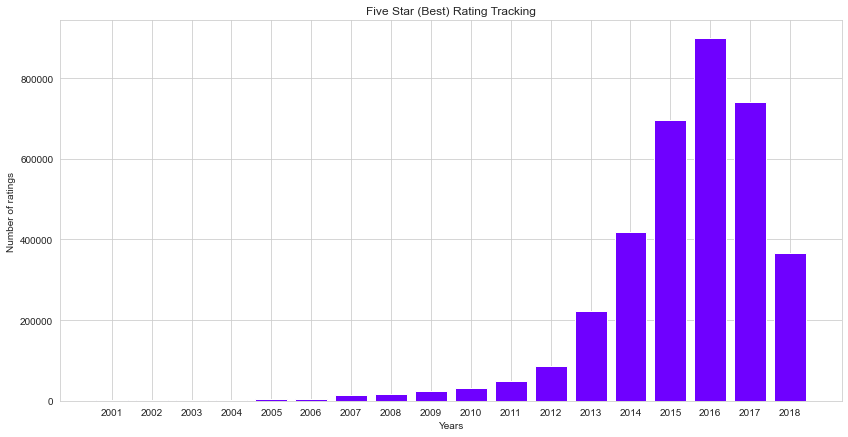

In [243]:
five_star_rating_graph()

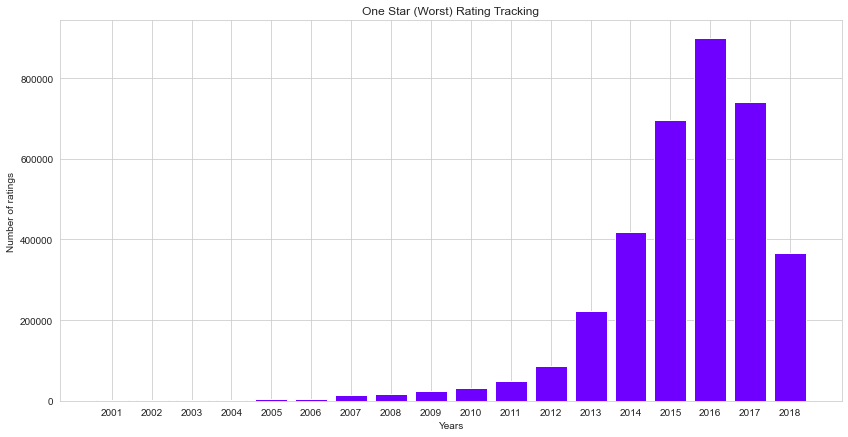

In [244]:
one_star_rating_graph()

# _Toys and Games_

In [245]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Toys_and_Games.csv')

In [246]:
df.head(2)

,rating,vote,verified,reviewerID,product_id,date
0,2,12,False,A1IDMI31WEANAF,0020232233,1474502400
1,1,21,False,A4BCEVVZ4Y3V3,0020232233,1474156800


In [247]:
rearrange_columns(df)

In [248]:
df.shape

(8191145, 6)

In [249]:
df.head()

,rating,vote,verified,reviewerID,product_id,date
0,2,12,False,A1IDMI31WEANAF,0020232233,2016-09-22
1,1,21,False,A4BCEVVZ4Y3V3,0020232233,2016-09-18
2,3,19,True,A2EZ9PY1IHHBX0,0020232233,2016-09-12
3,5,NaN,True,A139PXTTC2LGHZ,0020232233,2017-03-02
4,1,3,True,A3IB33V29XIL8O,0020232233,2017-02-08


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191145 entries, 0 to 8191144
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   rating      int32         
 1   vote        object        
 2   verified    bool          
 3   reviewerID  object        
 4   product_id  object        
 5   date        datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 289.0+ MB


In [251]:
print(df.isnull().sum())

rating              0
vote          7229643
verified            0
reviewerID          0
product_id          0
date                0
dtype: int64


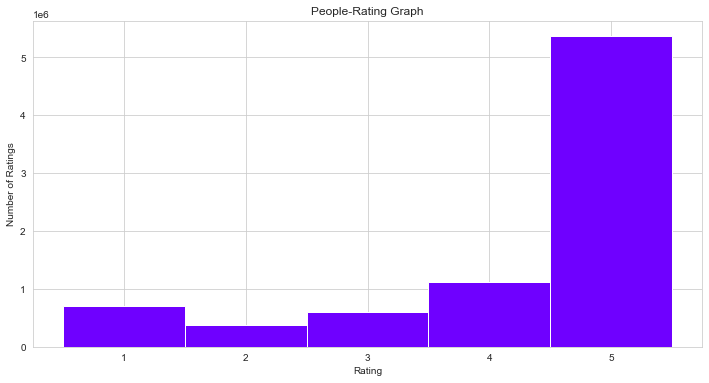

In [252]:
rating_histo_graph(df)

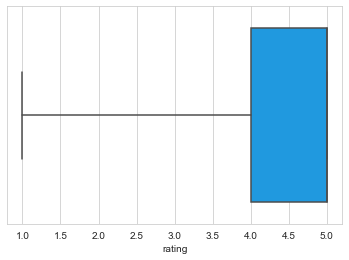

In [253]:
rating_boxplot(df)

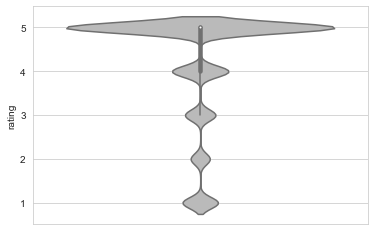

In [254]:
rating_violinplot(df)

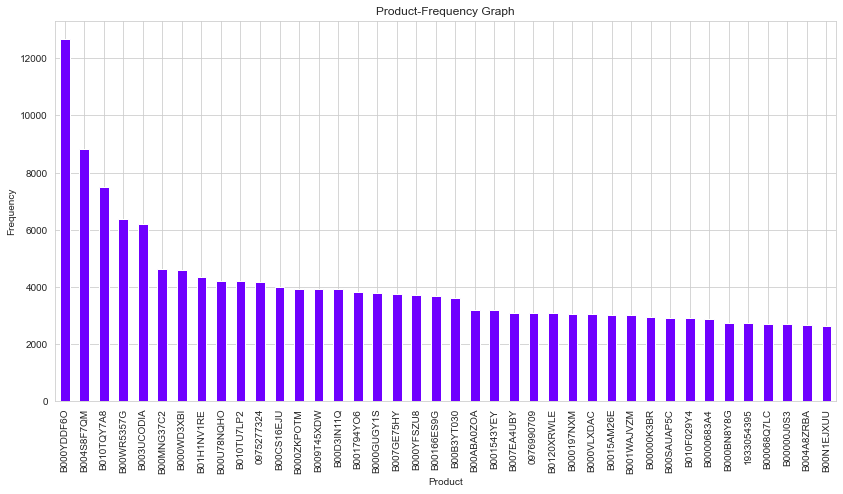

In [255]:
product_freq_graph(df)

In [256]:
df.corr()

,rating,verified
rating,1.000000,0.074921
verified,0.074921,1.000000


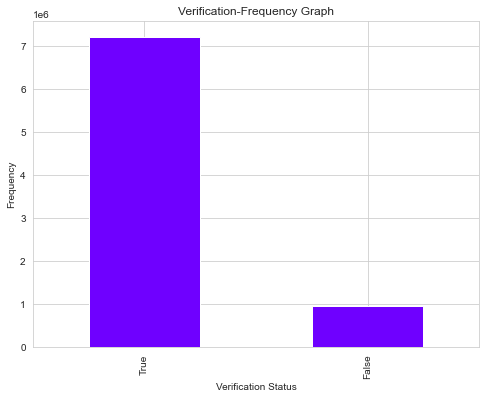

In [257]:
verified_accounts_graph(df)

In [258]:
df_verify = df.dropna()

In [259]:
df_verify.shape

(961502, 6)

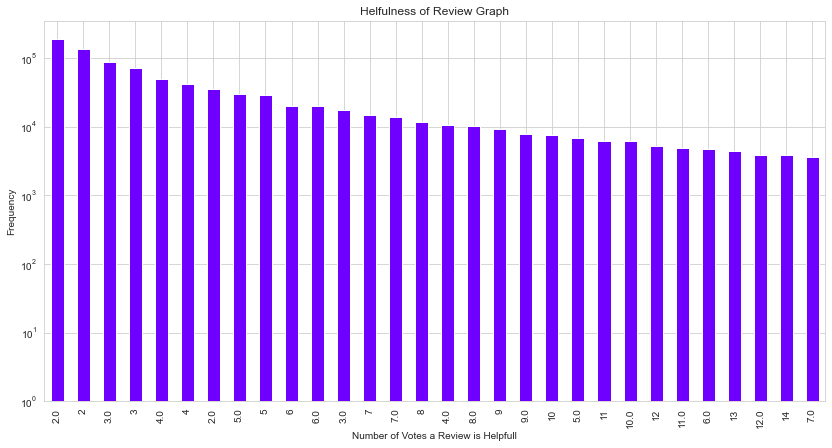

In [260]:
vote_helpfulness_graph(df)

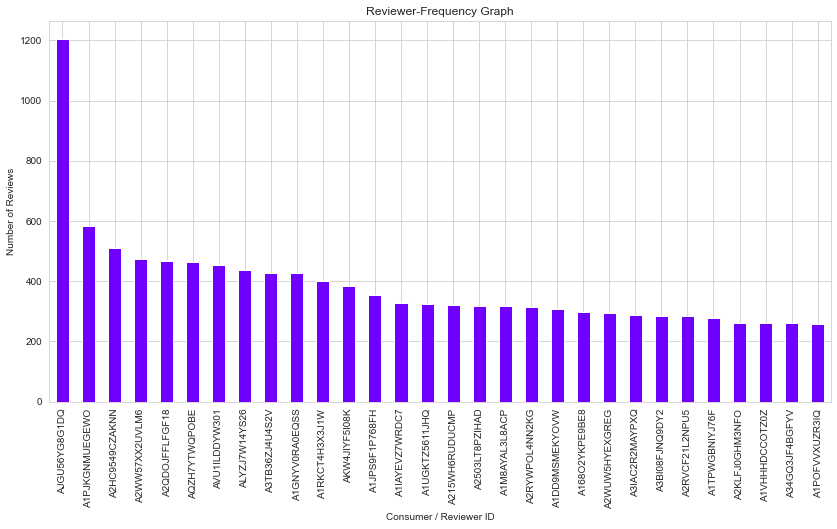

In [261]:
most_frequent_users_graph(df)

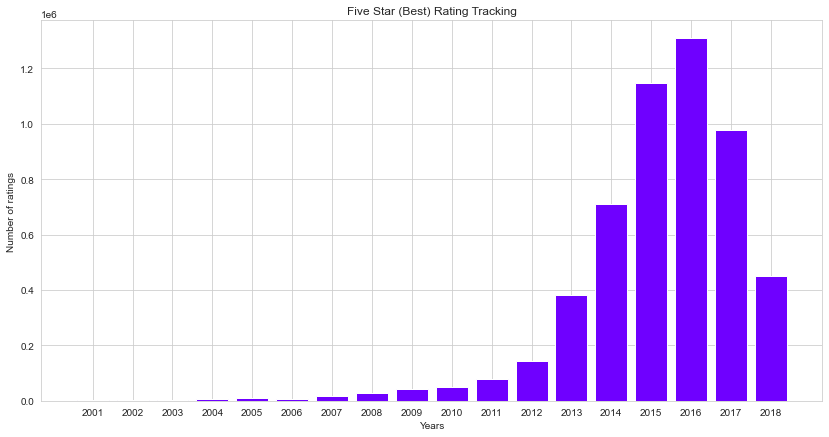

In [262]:
five_star_rating_graph()

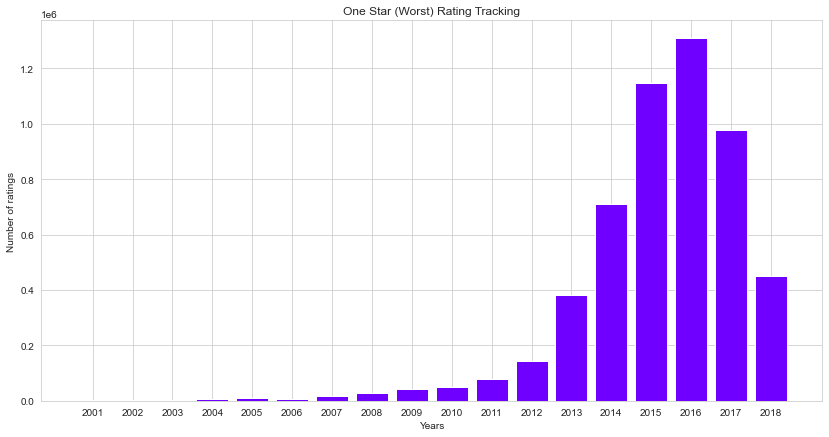

In [263]:
one_star_rating_graph()

# _Cell Phones and Accessories_

In [264]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Cell_Phones_and_Accessories.csv')

In [265]:
df.head(2)

,rating,verified,reviewerID,product_id,date,vote
0,5,False,A1GG51FWU0XQYH,098949232X,1416355200,NaN
1,5,False,AVFIDS9RK38E0,098949232X,1416355200,NaN


In [266]:
rearrange_columns(df)

In [267]:
df.shape

(10039627, 6)

In [268]:
df.head()

,rating,verified,reviewerID,product_id,date,vote
0,5,False,A1GG51FWU0XQYH,098949232X,2014-11-19,NaN
1,5,False,AVFIDS9RK38E0,098949232X,2014-11-19,NaN
2,5,False,A2S4AVR5SJ7KMI,098949232X,2014-11-19,NaN
3,5,False,AEMMMVOR9BFLI,098949232X,2014-11-19,NaN
4,5,False,A2DZXMBTY7KLYP,098949232X,2014-11-19,NaN


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10039627 entries, 0 to 10039626
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   rating      int32         
 1   verified    bool          
 2   reviewerID  object        
 3   product_id  object        
 4   date        datetime64[ns]
 5   vote        object        
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 354.3+ MB


In [270]:
print(df.isnull().sum())

rating              0
verified            0
reviewerID          0
product_id          0
date                0
vote          9353081
dtype: int64


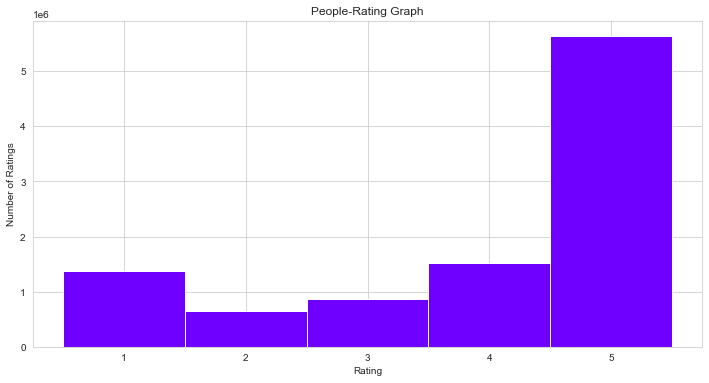

In [271]:
rating_histo_graph(df)

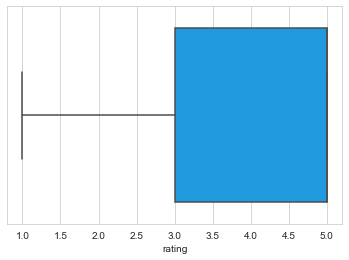

In [272]:
rating_boxplot(df)

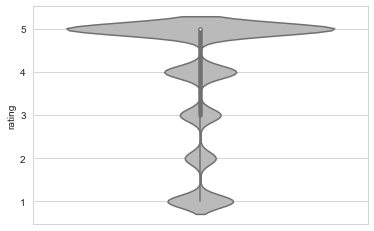

In [273]:
rating_violinplot(df)

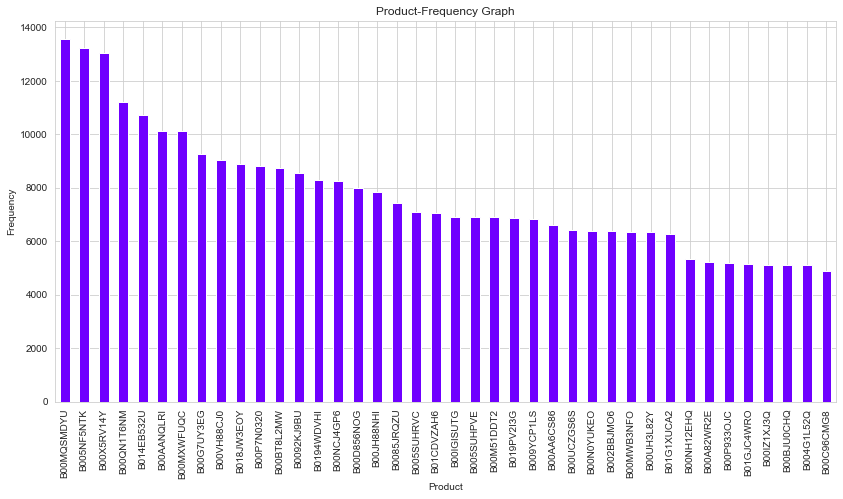

In [274]:
product_freq_graph(df)

In [275]:
df.corr()

,rating,verified
rating,1.000000,0.005845
verified,0.005845,1.000000


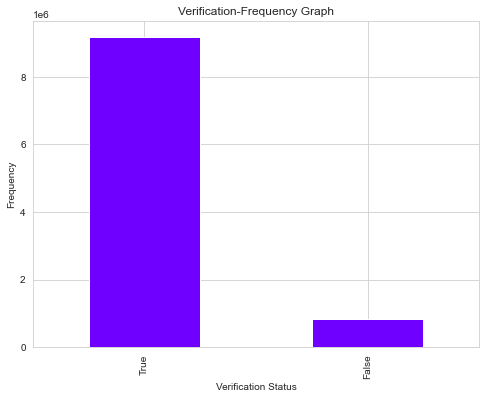

In [276]:
verified_accounts_graph(df)

In [277]:
df_verify = df.dropna()

In [278]:
df_verify.shape

(686546, 6)

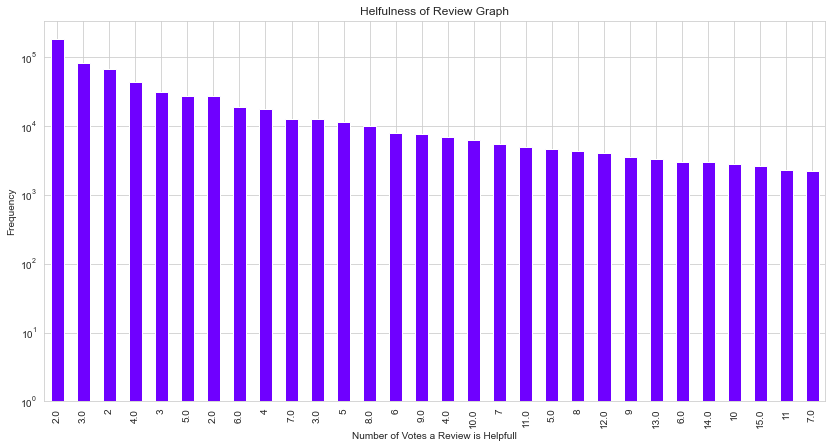

In [279]:
vote_helpfulness_graph(df)

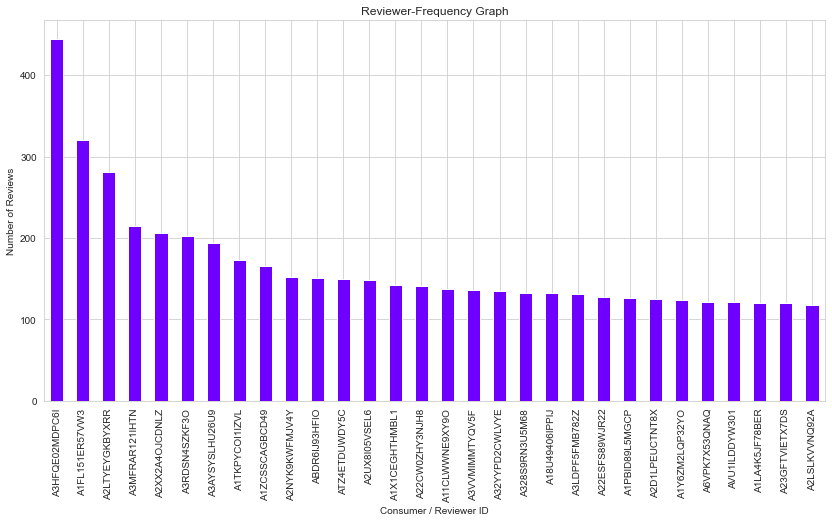

In [280]:
most_frequent_users_graph(df)

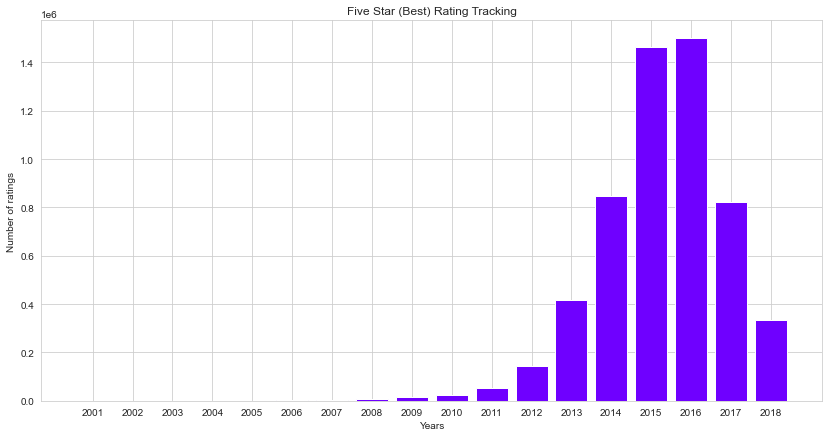

In [281]:
five_star_rating_graph()

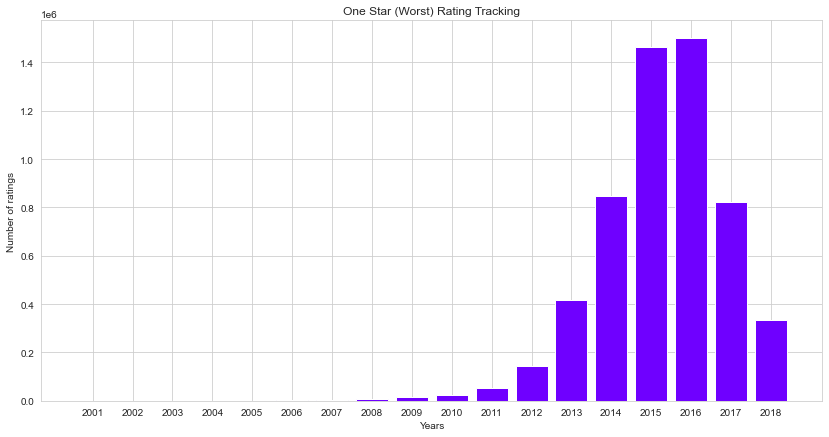

In [282]:
one_star_rating_graph()

# _Sports and Outdoors_

In [283]:
df = pd.read_csv('E:\\amazon-eda-datasets\\Sports_and_Outdoors.csv')

In [284]:
df.head(2)

,rating,verified,reviewerID,product_id,date,vote
0,5,False,A23K73OVXJ04EG,0000031895,1391212800,NaN
1,4,True,A2681T699HV6H1,0000031895,1384905600,NaN


In [285]:
rearrange_columns(df)

In [286]:
df.shape

(12969732, 6)

In [287]:
df.head()

,rating,verified,reviewerID,product_id,date,vote
0,5,False,A23K73OVXJ04EG,0000031895,2014-02-01,NaN
1,4,True,A2681T699HV6H1,0000031895,2013-11-20,NaN
2,1,True,A374PA18DCGS5Y,0000031895,2016-10-21,NaN
3,5,True,A14PVW2N5YBWSA,0000031895,2016-10-18,NaN
4,1,True,A2KWBC44QI2567,0000031895,2016-10-17,NaN


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12969732 entries, 0 to 12969731
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   rating      int32         
 1   verified    bool          
 2   reviewerID  object        
 3   product_id  object        
 4   date        datetime64[ns]
 5   vote        object        
dtypes: bool(1), datetime64[ns](1), int32(1), object(3)
memory usage: 457.6+ MB


In [289]:
print(df.isnull().sum())

rating               0
verified             0
reviewerID           0
product_id           0
date                 0
vote          11378765
dtype: int64


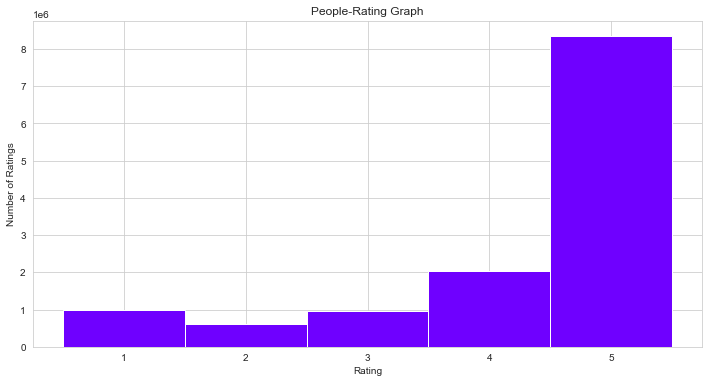

In [290]:
rating_histo_graph(df)

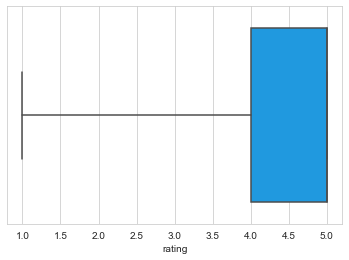

In [291]:
rating_boxplot(df)

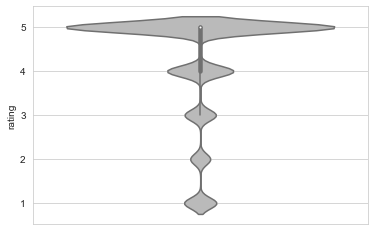

In [292]:
rating_violinplot(df)

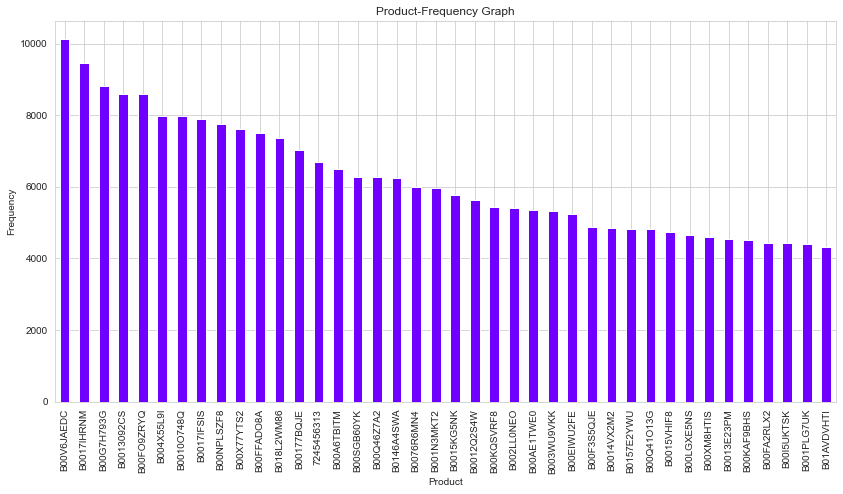

In [293]:
product_freq_graph(df)

In [294]:
df.corr()

,rating,verified
rating,1.000000,0.039658
verified,0.039658,1.000000


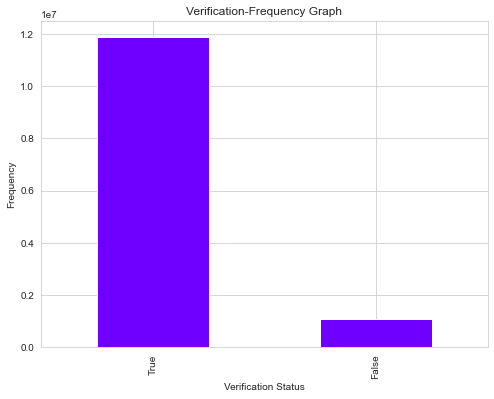

In [295]:
verified_accounts_graph(df)

In [296]:
df_verify = df.dropna()

In [297]:
df_verify.shape

(1590967, 6)

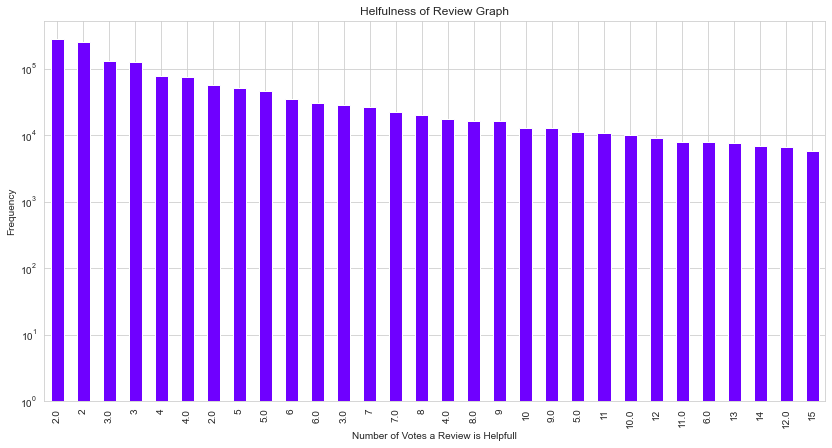

In [298]:
vote_helpfulness_graph(df)

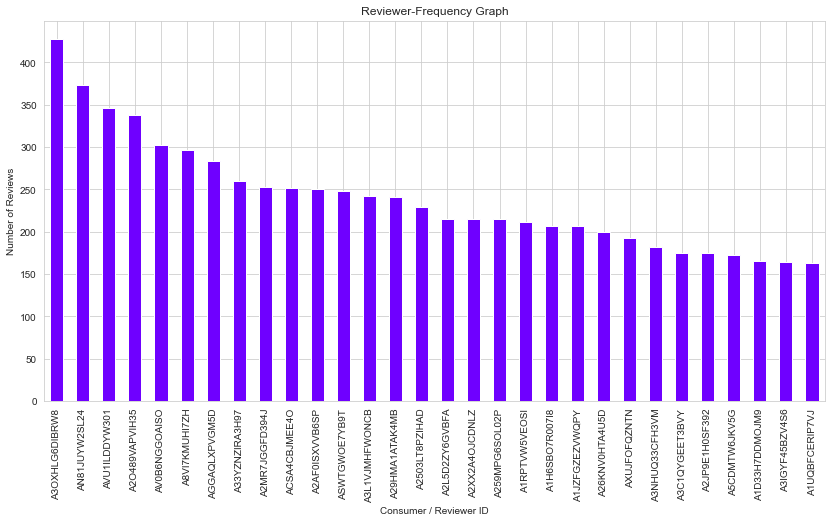

In [299]:
most_frequent_users_graph(df)

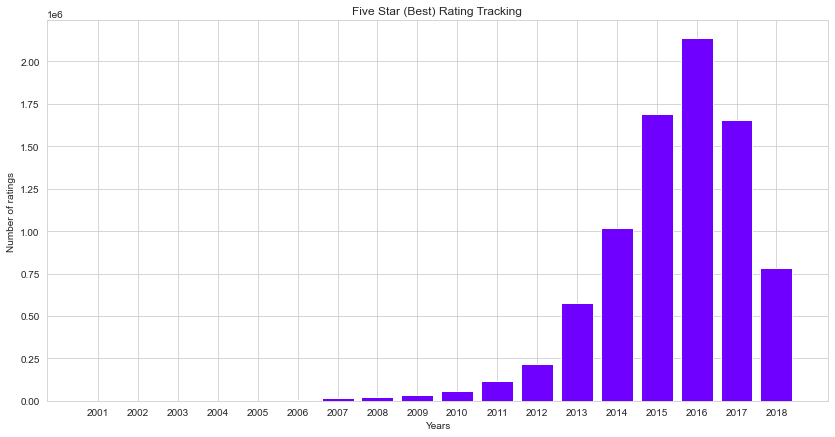

In [300]:
five_star_rating_graph()

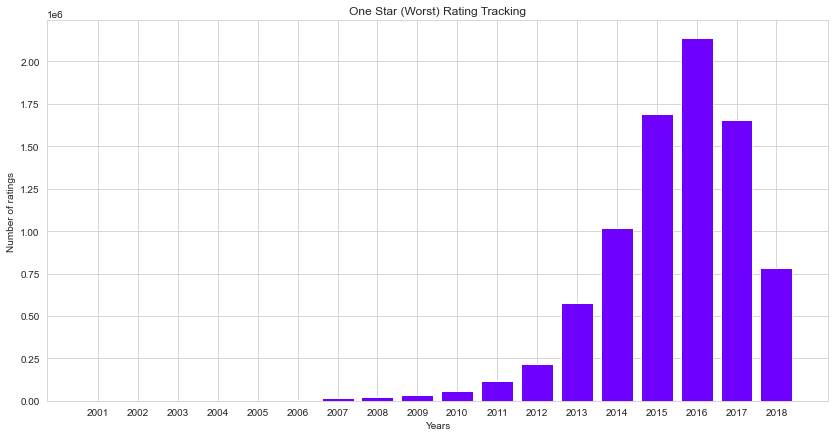

In [301]:
one_star_rating_graph()